# FINAL PROJECT : Predicting the success of a Kickstarter project

# Importation of data and packages

In [ ]:
import pandas as pd
#import missingno as msno
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf


from sklearn import metrics

pd.set_option('display.max_columns', None)

Paths:<br>
Clement<br>

'/content/drive/MyDrive/data/' <br>
Aurelien<br>
<br>
'/content/drive/MyDrive/Colab Notebooks/3_cours/'<br>
Maurice<br>

'/content/drive/MyDrive/data/'<br>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

path = '/content/drive/MyDrive/data/'

df = pd.read_csv(path+'kickstarter.csv',index_col=0)
prix = pd.read_csv(path+'inflation.csv')
df= df.drop(columns=['Unnamed: 0.1'])
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,state,main_category,category,usd_goal_adj,money_per_day_adj,number_of_day,launched_date,launched_hour,launched_year,launched_month,launched_day,len_name,category_cat,main_category_cat,country_cat,currency_cat,count_7_days,time_last_proj,usd_goal_sq
0,0,Publishing,Poetry,1316.700300,22.316954,59,2015-08-11 00:00:00,12,2015,8,1,31,63,12,9,5,1347.0,7.0,1.733700e+06
1,0,Film & Video,Narrative Film,45884.717680,764.745295,60,2017-09-02 00:00:00,4,2017,9,5,45,53,6,21,13,946.0,5.0,2.105407e+09
2,0,Film & Video,Narrative Film,58307.868868,1295.730419,45,2013-01-12 00:00:00,0,2013,1,5,14,53,6,21,13,739.0,0.0,3.399808e+09
3,0,Music,Music,8797.279312,293.242644,30,2012-03-17 00:00:00,3,2012,3,5,49,52,10,21,13,906.0,1.0,7.739212e+07
4,0,Film & Video,Film & Audio Video,19630.741961,350.548964,56,2015-07-04 00:00:00,8,2015,7,5,58,33,6,21,13,1373.0,1.0,3.853660e+08


# Data Cleaning

In [ ]:
df = pd.read_csv(path+'ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [ ]:
df['state'].value_counts(normalize=True) * 100

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

In [ ]:
df['country'].value_counts(normalize=True) * 100

US      77.279414
GB       8.892387
CA       3.896889
AU       2.070189
DE       1.101513
N,0"     1.002744
FR       0.776156
IT       0.760047
NL       0.757406
ES       0.601065
SE       0.464003
MX       0.462683
NZ       0.382136
DK       0.293930
IE       0.214176
CH       0.200971
NO       0.186975
HK       0.163207
BE       0.162943
AT       0.157661
SG       0.146569
LU       0.016373
JP       0.010564
Name: country, dtype: float64

The values labelled with the country "N,0" are apparently an error from Kickstarter. As they represent only 1% of the dataset, we can drop them.
Source of error : https://www.kaggle.com/kemical/kickstarter-projects/discussion/177920

In [ ]:
df = df.drop(df[df['country'] == 'N,0"'].index)

In [ ]:
df['currency'].value_counts(normalize=True) * 100

USD    78.062177
GBP     8.982458
EUR     4.593399
CAD     3.936361
AUD     2.091158
SEK     0.468703
MXN     0.467369
NZD     0.386007
DKK     0.296908
CHF     0.203007
NOK     0.188868
HKD     0.164860
SGD     0.148054
JPY     0.010671
Name: currency, dtype: float64

In [ ]:
# Checking for null value
print(df.isnull().sum(axis = 0))

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


In [ ]:
#Check for duplicates
df_duplicate = df[df.duplicated()]
df_duplicate

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


#### Drop columns
There are some columns are "predictions", and not predictive variables, which means that we have to drop them.

In [ ]:
# removing columns that are not predictive variables
df = df.drop(columns = ['usd pledged','pledged','usd_pledged_real','goal','backers'])
df = df.dropna()

In [ ]:
df

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,US,19500.00
...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,canceled,US,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,US,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,US,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,US,15000.00


## Create new columns

### Format to datetime and deletion of some rows
We extract some informations about the launch date, with the following encoding : <br>
launched_month = {1 : January, 2 : February...} <br>
launched_day = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}

In [ ]:
# Year, month, day

df[['launched_date','launched_hour']] = df['launched'].str.split(expand=True)
df['launched'] = pd.to_datetime(df['launched'], format='%Y/%m/%d %H:%M:%S')
df['launched_date'] = pd.to_datetime(df['launched_date'], format='%Y-%m-%d') #format to datetime
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d') #format to datetime
df['launched_year'] = df['launched_date'].dt.year # extract year
df['launched_month'] = df['launched_date'].dt.month #extract month
df['launched_day'] = df['launched_date'].dt.dayofweek #extract day
df['launched_hour'] = df['launched'].dt.hour #extract hour

In [ ]:
### Once the date is formatted, we can check weird values
df.sort_values('launched_date').head(10)

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1970-01-01 01:00:00,suspended,CH,1905.97,1970-01-01,1,1970,1,3
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,1970-01-01 01:00:00,canceled,US,4000.00,1970-01-01,1,1970,1,3
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,1970-01-01 01:00:00,canceled,US,5000.00,1970-01-01,1,1970,1,3
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,1970-01-01 01:00:00,canceled,US,10000.00,1970-01-01,1,1970,1,3
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,1970-01-01 01:00:00,canceled,US,15000.00,1970-01-01,1,1970,1,3
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,1970-01-01 01:00:00,canceled,US,700.00,1970-01-01,1,1970,1,3
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,1970-01-01 01:00:00,canceled,US,500.00,1970-01-01,1,1970,1,3
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,2009-04-21 21:02:48,failed,US,1000.00,2009-04-21,21,2009,4,1
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,2009-04-23 00:07:53,failed,US,80000.00,2009-04-23,0,2009,4,3
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,2009-04-24 21:52:03,successful,US,20.00,2009-04-24,21,2009,4,4


In [ ]:
df.sort_values('launched_date').tail(10)

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day
163161,1830173355,Digital Dagger Coin,Art,Art,USD,2018-02-01,2018-01-02 14:38:17,live,US,650.00,2018-01-02,14,2018,1,1
348663,846377021,Schippertainment: The life of a Schipperke owner,Anthologies,Publishing,AUD,2018-02-01,2018-01-02 03:24:13,live,AU,3936.39,2018-01-02,3,2018,1,1
275919,473911584,A New Miss Eaves EP (& Videos),Hip-Hop,Music,USD,2018-02-01,2018-01-02 14:04:11,live,US,7500.00,2018-01-02,14,2018,1,1
120109,1610076616,The Adventures of Ife and Riff Raff,Animation,Film & Video,USD,2018-02-01,2018-01-02 04:37:13,live,US,20000.00,2018-01-02,4,2018,1,1
307614,636850157,O2F - The World's First Oxygen Filter Jumper,Wearables,Technology,AUD,2018-02-01,2018-01-02 05:19:19,live,AU,11809.16,2018-01-02,5,2018,1,1
116015,1589149664,Good X Mag Sunglasses and X Mag Hat,Design,Design,USD,2018-02-16,2018-01-02 06:38:39,live,US,999.00,2018-01-02,6,2018,1,1
282585,50783996,Site Inspect - Home Inspection Business App fo...,Apps,Technology,USD,2018-02-01,2018-01-02 06:44:25,live,US,30000.00,2018-01-02,6,2018,1,1
273700,462436087,Charlie Chimps Curious Creatures,Children's Books,Publishing,GBP,2018-02-11,2018-01-02 12:29:48,live,GB,954.78,2018-01-02,12,2018,1,1
192350,1978733762,Health mug and mana mug,Design,Design,JPY,2018-02-01,2018-01-02 09:30:37,live,JP,305.95,2018-01-02,9,2018,1,1
7164,1036415983,Aikyam : Onnu,Music,Music,USD,2018-03-03,2018-01-02 08:11:58,live,US,10000.00,2018-01-02,8,2018,1,1


We see that there are some rows with projects launched in 1970, which is aberrant. Then, we will delete those rows, so that our dataset starts in 2009.

In [ ]:
df = df.drop(df[df['launched_year'] < 2009].index)

### Adapting State column to get binary

In [ ]:
df.loc[df['state'] == 'canceled', 'state'] = 'failed'
df

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95,2015-08-11,12,2015,8,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00,2017-09-02,4,2017,9,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,45000.00,2013-01-12,0,2013,1,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,5000.00,2012-03-17,3,2012,3,5
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,failed,US,19500.00,2015-07-04,8,2015,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,failed,US,50000.00,2014-09-17,2,2014,9,2
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,US,1500.00,2011-06-22,3,2011,6,2
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,US,15000.00,2010-07-01,19,2010,7,3
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,US,15000.00,2016-01-13,18,2016,1,2


In [ ]:
df = df.loc[((df['state'] == 'failed') | (df['state'] == 'successful'))]
df

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95,2015-08-11,12,2015,8,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00,2017-09-02,4,2017,9,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,45000.00,2013-01-12,0,2013,1,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,5000.00,2012-03-17,3,2012,3,5
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,failed,US,19500.00,2015-07-04,8,2015,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,failed,US,50000.00,2014-09-17,2,2014,9,2
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,US,1500.00,2011-06-22,3,2011,6,2
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,US,15000.00,2010-07-01,19,2010,7,3
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,US,15000.00,2016-01-13,18,2016,1,2


In [ ]:
# We encode success and failure as a binary variable
d = {'failed': 0, 'successful': 1 }
df['state'] = df['state'].map(d).fillna(df['state'])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,2015-08-11,12,2015,8,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,US,30000.00,2017-09-02,4,2017,9,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,US,45000.00,2013-01-12,0,2013,1,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,US,5000.00,2012-03-17,3,2012,3,5
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,US,19500.00,2015-07-04,8,2015,7,5


### Creation of new features
https://www.kaggle.com/matleonard/feature-generation

In [ ]:
# Length of project name
df["len_name"] = df["name"].str.len()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Amount of money needed per day
df['Number_of_day'] = (df['deadline'] - df['launched_date']).dt.days
df['MoneyPerDay'] = df['usd_goal_real'] / df['Number_of_day']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day,len_name,Number_of_day,MoneyPerDay
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,2015-08-11,12,2015,8,1,31,59,25.999153
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,US,30000.00,2017-09-02,4,2017,9,5,45,60,500.000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,US,45000.00,2013-01-12,0,2013,1,5,14,45,1000.000000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,US,5000.00,2012-03-17,3,2012,3,5,49,30,166.666667
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,US,19500.00,2015-07-04,8,2015,7,5,58,56,348.214286


### Creation of variable : number of kickstarter last week

In [ ]:
# First, create a Series with a time index, to order it in time
launched = pd.Series(df.index, index=df['launched'], name="count_7_days").sort_index()
launched.head(20)

launched
2009-04-21 21:02:48    169268
2009-04-23 00:07:53    322000
2009-04-24 21:52:03    138572
2009-04-25 17:36:21    325391
2009-04-27 14:10:39    122662
2009-04-28 13:55:41    213711
2009-04-29 02:04:21    345606
2009-04-29 02:58:50    235255
2009-04-29 04:37:37     98954
2009-04-29 05:26:32    342226
2009-04-29 06:43:44    275091
2009-04-29 13:52:03    284115
2009-04-29 22:08:13     32898
2009-04-29 23:11:15    153308
2009-04-30 01:32:55     19561
2009-04-30 07:14:06    225159
2009-04-30 22:10:30     28960
2009-04-30 22:22:43     59959
2009-04-30 22:23:22    157553
2009-05-01 05:06:19    359589
Name: count_7_days, dtype: int64

In [ ]:
#Number of projects in the last week, we use the rolling fucntion to count last 7 days (). It takes in account today, and 6 days before
count_7_days = launched.rolling('7d').count() - 1
print(count_7_days.head(20))

launched
2009-04-21 21:02:48     0.0
2009-04-23 00:07:53     1.0
2009-04-24 21:52:03     2.0
2009-04-25 17:36:21     3.0
2009-04-27 14:10:39     4.0
2009-04-28 13:55:41     5.0
2009-04-29 02:04:21     5.0
2009-04-29 02:58:50     6.0
2009-04-29 04:37:37     7.0
2009-04-29 05:26:32     8.0
2009-04-29 06:43:44     9.0
2009-04-29 13:52:03    10.0
2009-04-29 22:08:13    11.0
2009-04-29 23:11:15    12.0
2009-04-30 01:32:55    12.0
2009-04-30 07:14:06    13.0
2009-04-30 22:10:30    14.0
2009-04-30 22:22:43    15.0
2009-04-30 22:23:22    16.0
2009-05-01 05:06:19    17.0
Name: count_7_days, dtype: float64


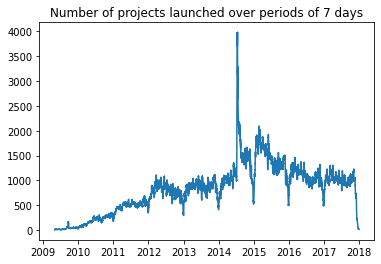

In [ ]:
# Ignore records with broken launch dates
plt.plot(count_7_days[7:]);
plt.title("Number of projects launched over periods of 7 days");

In [ ]:
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(df.index)

In [ ]:
df = df.join(count_7_days)
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day,len_name,Number_of_day,MoneyPerDay,count_7_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,2015-08-11,12,2015,8,1,31,59,25.999153,1347.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,US,30000.00,2017-09-02,4,2017,9,5,45,60,500.000000,946.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,US,45000.00,2013-01-12,0,2013,1,5,14,45,1000.000000,739.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,US,5000.00,2012-03-17,3,2012,3,5,49,30,166.666667,906.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,US,19500.00,2015-07-04,8,2015,7,5,58,56,348.214286,1373.0


### Creation of variable : number of hours since a project was launched in the same category

In [ ]:
def time_since_last_project(series):
    # Return the time in hours
    return series.diff().dt.total_seconds()/ 3600.

temp_df = df[['category', 'launched']].sort_values('launched')
temp_df['launched'] = pd.to_datetime(temp_df['launched'], format='%Y/%m/%d %H:%M:%S')
temp_df

,category,launched
169268,Fashion,2009-04-21 21:02:48
322000,Shorts,2009-04-23 00:07:53
138572,Illustration,2009-04-24 21:52:03
325391,Software,2009-04-25 17:36:21
122662,Fashion,2009-04-27 14:10:39
...,...,...
339929,Hip-Hop,2017-12-29 03:22:32
62039,Web,2017-12-29 21:06:11
11463,Tabletop Games,2017-12-31 13:53:53
167940,Comic Books,2018-01-01 00:54:41


In [ ]:
timedeltas = temp_df.groupby('category').transform(time_since_last_project)
timedeltas.head(20)

,launched
169268,NaN
322000,NaN
138572,NaN
325391,NaN
122662,137.130833
213711,NaN
345606,145.941111
235255,NaN
98954,NaN
342226,NaN


In [ ]:
# Final time since last project
timedeltas = timedeltas.fillna(timedeltas.median()).reindex(df.index)
timedeltas['launched']= timedeltas['launched'].round(0)
timedeltas.head(5)

,launched
0,19.0
1,6.0
2,1.0
3,1.0
4,17.0


In [ ]:
timedeltas.index = launched.values
timedeltas = timedeltas.reindex(df.index)
timedeltas

,launched
0,7.0
1,5.0
2,0.0
3,1.0
4,1.0
...,...
378656,17.0
378657,10.0
378658,70.0
378659,49.0


In [ ]:
timedeltas = timedeltas.rename(columns={'launched' : 'timedeltas'})

In [ ]:
#df = df.join(count_7_days).sort_values('launched').head()
df = df.join(timedeltas)

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day,len_name,Number_of_day,MoneyPerDay,count_7_days,timedeltas
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,2015-08-11,12,2015,8,1,31,59,25.999153,1347.0,7.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,US,30000.00,2017-09-02,4,2017,9,5,45,60,500.000000,946.0,5.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,US,45000.00,2013-01-12,0,2013,1,5,14,45,1000.000000,739.0,0.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,US,5000.00,2012-03-17,3,2012,3,5,49,30,166.666667,906.0,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,US,19500.00,2015-07-04,8,2015,7,5,58,56,348.214286,1373.0,1.0


### Adjusting prices to inflation

In [ ]:
df_prix = df[['usd_goal_real', 'launched_date']]

prix = pd.read_csv(path+'inflation.csv')

prix['DATE'] = pd.to_datetime(prix['DATE']).dt.to_period('M')

df_prix['launched_month'] = df_prix['launched_date'].dt.to_period('M')

df_prix = df_prix.join(prix.set_index('DATE'), on = ('launched_month'))

df_prix['multiplier'] = df_prix['CPALTT01USM657N'] + 1
df_prix['usd_goal_adj'] = df_prix['usd_goal_real'] * df_prix['multiplier']
df_prix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,usd_goal_real,launched_date,launched_month,CPALTT01USM657N,multiplier,usd_goal_adj
0,1533.95,2015-08-11,2015-08,-0.141628,0.858372,1316.700300
1,30000.00,2017-09-02,2017-09,0.529491,1.529491,45884.717680
2,45000.00,2013-01-12,2013-01,0.295730,1.295730,58307.868868
3,5000.00,2012-03-17,2012-03,0.759456,1.759456,8797.279312
4,19500.00,2015-07-04,2015-07,0.006705,1.006705,19630.741961
...,...,...,...,...,...,...
378656,50000.00,2014-09-17,2014-09,0.075257,1.075257,53762.844122
378657,1500.00,2011-06-22,2011-06,-0.107097,0.892903,1339.354941
378658,15000.00,2010-07-01,2010-07,0.021104,1.021104,15316.564586
378659,15000.00,2016-01-13,2016-01,0.165310,1.165310,17479.653314


In [ ]:
df['usd_goal_adj'] = df_prix['usd_goal_adj']
df['multiplier'] = df_prix['multiplier']
df['money_per_day_adj'] = df['MoneyPerDay'] * df['multiplier']
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day,len_name,Number_of_day,MoneyPerDay,count_7_days,timedeltas,usd_goal_adj,multiplier,money_per_day_adj
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,2015-08-11,12,2015,8,1,31,59,25.999153,1347.0,7.0,1316.700300,0.858372,22.316954
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,US,30000.00,2017-09-02,4,2017,9,5,45,60,500.000000,946.0,5.0,45884.717680,1.529491,764.745295
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,US,45000.00,2013-01-12,0,2013,1,5,14,45,1000.000000,739.0,0.0,58307.868868,1.295730,1295.730419
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,US,5000.00,2012-03-17,3,2012,3,5,49,30,166.666667,906.0,1.0,8797.279312,1.759456,293.242644
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,US,19500.00,2015-07-04,8,2015,7,5,58,56,348.214286,1373.0,1.0,19630.741961,1.006705,350.548964


In [ ]:
categorical = ['category', 'main_category', 'currency', 'country', 'launched_year', 'launched_month', 'launched_day', 'launched_hour']
continuous = [
              'usd_goal_real', 'len_name', 'Number_of_day', 'MoneyPerDay', 'count_7_days', 'timedeltas']
explained_var = ['state']
datetime = ['deadline', 'launched', 'launched_date']

In [ ]:
b = df[['main_category', 'category']]
#b['category'] = b['category'].replace(to_replace = 'Art', value = 'Bite', regex=True)
c = pd.DataFrame(b.groupby('main_category')['category'].value_counts())



b['category'] = b['category'].replace(to_replace = 'Video Art', value = 'Digital Art', regex=True)
b['category'] = b['category'].replace(to_replace = 'Textiles', value = 'Art', regex=True)
b['category'] = b['category'].replace(to_replace = 'Ceramics', value = 'Sculpture', regex=True)
b['category'] = b['category'].replace(to_replace = 'Installations', value = 'Sculpture', regex=True)

b['category'] = b['category'].replace(to_replace = 'Events', value = 'Comics', regex=True)
b['category'] = b['category'].replace(to_replace = 'Anthologies', value = 'Comics', regex=True)
b['category'] = b['category'].replace(to_replace = 'Webcomics', value = 'Graphic Novels', regex=True)

b['category'] = b['category'].replace(to_replace = 'Taxidermy', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Letterpress', value = 'DIY', regex=True)
b['category'] = b['category'].replace(to_replace = 'Quilts', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Weaving', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Pottery', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Embroidery', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Glass', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Crochet', value = 'DIY', regex=True)
b['category'] = b['category'].replace(to_replace = 'Knitting', value = 'DIY', regex=True)
b['category'] = b['category'].replace(to_replace = 'Stationery', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Printing', value = 'Crafts', regex=True)
b['category'] = b['category'].replace(to_replace = 'Candles', value = 'DIY', regex=True)

b['category'] = b['category'].replace(to_replace = 'Residencies', value = 'Performances', regex=True)
b['category'] = b['category'].replace(to_replace = 'Workshops', value = 'Performances', regex=True)
b['category'] = b['category'].replace(to_replace = 'Spaces', value = 'Performances', regex=True)

b['category'] = b['category'].replace(to_replace = 'Typography', value = 'Graphic Design', regex=True)
b['category'] = b['category'].replace(to_replace = 'Civic Design', value = 'Design', regex=True)
b['category'] = b['category'].replace(to_replace = 'Interactive Design', value = 'Design', regex=True)
b['category'] = b['category'].replace(to_replace = 'Architecture', value = 'Graphic Design', regex=True)

b['category'] = b['category'].replace(to_replace = 'Pet Fashion', value = 'Fashion', regex=True)
b['category'] = b['category'].replace(to_replace = 'Couture', value = 'Fashion', regex=True)
b['category'] = b['category'].replace(to_replace = 'Childrenswear', value = 'Fashion', regex=True)
b['category'] = b['category'].replace(to_replace = 'Ready-to-wear', value = 'Fashion', regex=True)
b['category'] = b['category'].replace(to_replace = 'Footwear', value = 'Fashion', regex=True)

b['category'] = b['category'].replace(to_replace = 'Romance', value = 'Film & Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Movie Theaters', value = 'Film & Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Festivals', value = 'Film & Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Family', value = 'Film & Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Fantasy', value = 'Action', regex=True)
b['category'] = b['category'].replace(to_replace = 'Experimental', value = 'Film & Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Music Videos', value = 'Film & Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Thrillers', value = 'Drama', regex=True)
b['category'] = b['category'].replace(to_replace = 'Science Fiction', value = 'Action', regex=True)

b['category'] = b['category'].replace(to_replace = 'Bacon', value = 'Food', regex=True)
b['category'] = b['category'].replace(to_replace = 'Community Gardens', value = 'Farms', regex=True)
b['category'] = b['category'].replace(to_replace = "Farmer's Markets", value = 'Farms', regex=True)
b['category'] = b['category'].replace(to_replace = 'Spaces', value = 'Farms', regex=True)
b['category'] = b['category'].replace(to_replace = 'Cookbooks', value = 'Food', regex=True)
b['category'] = b['category'].replace(to_replace = 'Vegan', value = 'Food', regex=True)
b['category'] = b['category'].replace(to_replace = 'Events', value = 'Restaurants', regex=True)

b['category'] = b['category'].replace(to_replace = 'Puzzles', value = 'Tabletop Games', regex=True)
b['category'] = b['category'].replace(to_replace = 'Gaming Hardware', value = 'Video Games', regex=True)

b['category'] = b['category'].replace(to_replace = 'Photo', value = 'Audio Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Audio', value = 'Audio Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Video', value = 'Audio Video', regex=True)
b['category'] = b['category'].replace(to_replace = 'Print', value = 'Audio Video', regex=True)

b['category'] = b['category'].replace(to_replace = 'Comedy', value = 'Music', regex=True)
b['category'] = b['category'].replace(to_replace = 'Chiptune', value = 'Music', regex=True)
b['category'] = b['category'].replace(to_replace = 'Latin', value = 'Music', regex=True)
b['category'] = b['category'].replace(to_replace = 'Blues', value = 'Music', regex=True)
b['category'] = b['category'].replace(to_replace = 'Kids', value = 'Music', regex=True)
b['category'] = b['category'].replace(to_replace = 'Punk', value = 'Rock', regex=True)
b['category'] = b['category'].replace(to_replace = 'R&B', value = 'Pop', regex=True)
b['category'] = b['category'].replace(to_replace = 'Metal', value = 'Rock', regex=True)

b['category'] = b['category'].replace(to_replace = 'Animals', value = 'Photography', regex=True)
b['category'] = b['category'].replace(to_replace = 'Nature', value = 'Photography', regex=True)
b['category'] = b['category'].replace(to_replace = 'Places', value = 'Photography', regex=True)
b['category'] = b['category'].replace(to_replace = 'Fine Art', value = 'Photography', regex=True)

b['category'] = b['category'].replace(to_replace = 'Letterpress', value = 'Periodicals', regex=True)
b['category'] = b['category'].replace(to_replace = 'Literary Journals', value = 'Periodicals', regex=True)
b['category'] = b['category'].replace(to_replace = 'Comedy', value = 'Publishing', regex=True)
b['category'] = b['category'].replace(to_replace = 'Translations', value = 'Publishing', regex=True)
b['category'] = b['category'].replace(to_replace = 'Literary Spaces', value = 'Periodicals', regex=True)
b['category'] = b['category'].replace(to_replace = 'Calendars', value = 'Art Books', regex=True)
b['category'] = b['category'].replace(to_replace = 'Anthologies', value = 'Publishing', regex=True)
b['category'] = b['category'].replace(to_replace = 'Zines', value = 'Publishing', regex=True)
b['category'] = b['category'].replace(to_replace = 'Young Adult', value = 'Fiction', regex=True)
b['category'] = b['category'].replace(to_replace = 'Academic', value = 'Nonfiction', regex=True)
b['category'] = b['category'].replace(to_replace = 'Radio & Podcasts', value = 'Periodicals', regex=True)

b['category'] = b['category'].replace(to_replace = 'Makerspaces', value = 'Technology', regex=True)
b['category'] = b['category'].replace(to_replace = 'Fabrication Tools', value = 'Software', regex=True)
b['category'] = b['category'].replace(to_replace = 'Space Exploration', value = 'Technology', regex=True)
b['category'] = b['category'].replace(to_replace = 'Camera Equipment', value = 'Technology', regex=True)
b['category'] = b['category'].replace(to_replace = 'Flight', value = 'Technology', regex=True)
b['category'] = b['category'].replace(to_replace = 'Robots', value = 'Software', regex=True)
b['category'] = b['category'].replace(to_replace = 'Sound', value = 'Technology', regex=True)
b['category'] = b['category'].replace(to_replace = '3D Printing', value = 'Technology', regex=True)
b['category'] = b['category'].replace(to_replace = 'DIY Electronics', value = 'Hardware', regex=True)

b['category'] = b['category'].replace(to_replace = 'Comedy', value = 'Plays', regex=True)
b['category'] = b['category'].replace(to_replace = 'Spaces', value = 'Theater', regex=True)
b['category'] = b['category'].replace(to_replace = 'Immersive', value = 'Plays', regex=True)
b['category'] = b['category'].replace(to_replace = 'Experimental', value = 'Plays', regex=True)
b['category'] = b['category'].replace(to_replace = 'Festivals', value = 'Theater', regex=True)
b['category'] = b['category'].replace(to_replace = 'Musical', value = 'Theater', regex=True)


df['category'] = b['category']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,launched_date,launched_hour,launched_year,launched_month,launched_day,len_name,Number_of_day,MoneyPerDay,count_7_days,timedeltas,usd_goal_adj,multiplier,money_per_day_adj
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0,GB,1533.95,2015-08-11,12,2015,8,1,31,59,25.999153,1347.0,7.0,1316.700300,0.858372,22.316954
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,0,US,30000.00,2017-09-02,4,2017,9,5,45,60,500.000000,946.0,5.0,45884.717680,1.529491,764.745295
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,0,US,45000.00,2013-01-12,0,2013,1,5,14,45,1000.000000,739.0,0.0,58307.868868,1.295730,1295.730419
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,0,US,5000.00,2012-03-17,3,2012,3,5,49,30,166.666667,906.0,1.0,8797.279312,1.759456,293.242644
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Audio Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,0,US,19500.00,2015-07-04,8,2015,7,5,58,56,348.214286,1373.0,1.0,19630.741961,1.006705,350.548964


# Split the dataset

## Without one-hot encoding

In [ ]:
y = df['state']
X_not_scaled = df[[ 'launched_hour',
       'launched_year', 'launched_month', 'launched_day',
       'category_cat', 'main_category_cat', 'country_cat', 'currency_cat']]
X_to_scale = df[['usd_goal_adj', 'money_per_day_adj', 'number_of_day', 'count_7_days', 'len_name', 'usd_goal_sq', 'time_last_proj']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_to_scale[['usd_goal_adj',
                'money_per_day_adj',
                'number_of_day',
                'count_7_days',
                'len_name',
                'usd_goal_sq',
                'time_last_proj']] = scaler.fit_transform(X_to_scale)


X = pd.concat([X_to_scale, X_not_scaled], axis=1)
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,usd_goal_adj,money_per_day_adj,number_of_day,count_7_days,len_name,usd_goal_sq,time_last_proj,launched_hour,launched_year,launched_month,launched_day,category_cat,main_category_cat,country_cat,currency_cat
0,-0.037853,-0.018334,1.942232,0.539185,-0.240825,-0.010948,-0.060992,12,2015,8,1,63,12,9,5
1,-0.003229,-0.009752,2.020450,-0.326054,0.637313,-0.010934,-0.077384,4,2017,9,5,53,6,21,13
2,0.006422,-0.003614,0.847186,-0.772699,-1.307135,-0.010925,-0.118364,0,2013,1,5,53,6,21,13
3,-0.032041,-0.015202,-0.326078,-0.412362,0.888209,-0.010947,-0.110168,3,2012,3,5,52,10,21,13
4,-0.023625,-0.014539,1.707579,0.595286,1.452726,-0.010945,-0.110168,8,2015,7,5,33,6,21,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370208,0.002891,0.002123,-0.326078,0.750640,0.888209,-0.010929,0.020969,2,2014,9,2,25,6,21,13
370209,-0.037835,-0.018018,-0.560731,-1.281918,-1.620756,-0.010948,-0.036404,3,2011,6,2,53,6,21,13
370210,-0.026977,-0.014743,0.925403,-1.853709,2.268140,-0.010946,0.266849,19,2010,7,3,53,6,21,13
370211,-0.025296,-0.012074,-0.247861,-0.088707,-0.679894,-0.010946,0.225869,18,2016,1,2,75,13,21,13


In [ ]:
from sklearn.model_selection import train_test_split

X_model, X_test_model, y_model, y_test_model = train_test_split(
    X, y, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.2, random_state=0)

## With one-hot encoding

In [ ]:
X_not_scaled_2 = X_not_scaled.copy()
X_not_scaled_2 = X_not_scaled[['launched_hour',
       'launched_year', 'launched_month', 'launched_day',
       'category_cat', 'main_category_cat', 'country_cat', 'currency_cat']].astype(str)
X_not_scaled_3 = pd.get_dummies(X_not_scaled_2)


In [ ]:
X_hot = pd.concat([X_to_scale, X_not_scaled_3], axis=1)
X_hot

,usd_goal_adj,money_per_day_adj,number_of_day,count_7_days,len_name,usd_goal_sq,time_last_proj,launched_hour_0,launched_hour_1,launched_hour_10,launched_hour_11,launched_hour_12,launched_hour_13,launched_hour_14,launched_hour_15,launched_hour_16,launched_hour_17,launched_hour_18,launched_hour_19,launched_hour_2,launched_hour_20,launched_hour_21,launched_hour_22,launched_hour_23,launched_hour_3,launched_hour_4,launched_hour_5,launched_hour_6,launched_hour_7,launched_hour_8,launched_hour_9,launched_year_2009,launched_year_2010,launched_year_2011,launched_year_2012,launched_year_2013,launched_year_2014,launched_year_2015,launched_year_2016,launched_year_2017,launched_year_2018,launched_month_1,launched_month_10,launched_month_11,launched_month_12,launched_month_2,launched_month_3,launched_month_4,launched_month_5,launched_month_6,launched_month_7,launched_month_8,launched_month_9,launched_day_0,launched_day_1,launched_day_2,launched_day_3,launched_day_4,launched_day_5,launched_day_6,category_cat_0,category_cat_1,category_cat_10,category_cat_11,category_cat_12,category_cat_13,category_cat_14,category_cat_15,category_cat_16,category_cat_17,category_cat_18,category_cat_19,category_cat_2,category_cat_20,category_cat_21,category_cat_22,category_cat_23,category_cat_24,category_cat_25,category_cat_26,category_cat_27,category_cat_28,category_cat_29,category_cat_3,category_cat_30,category_cat_31,category_cat_32,category_cat_33,category_cat_34,category_cat_35,category_cat_36,category_cat_37,category_cat_38,category_cat_39,category_cat_4,category_cat_40,category_cat_41,category_cat_42,category_cat_43,category_cat_44,category_cat_45,category_cat_46,category_cat_47,category_cat_48,category_cat_49,category_cat_5,category_cat_50,category_cat_51,category_cat_52,category_cat_53,category_cat_54,category_cat_55,category_cat_56,category_cat_57,category_cat_58,category_cat_59,category_cat_6,category_cat_60,category_cat_61,category_cat_62,category_cat_63,category_cat_64,category_cat_65,category_cat_66,category_cat_67,category_cat_68,category_cat_69,category_cat_7,category_cat_70,category_cat_71,category_cat_72,category_cat_73,category_cat_74,category_cat_75,category_cat_76,category_cat_77,category_cat_78,category_cat_79,category_cat_8,category_cat_80,category_cat_81,category_cat_82,category_cat_9,main_category_cat_0,main_category_cat_1,main_category_cat_10,main_category_cat_11,main_category_cat_12,main_category_cat_13,main_category_cat_14,main_category_cat_2,main_category_cat_3,main_category_cat_4,main_category_cat_5,main_category_cat_6,main_category_cat_7,main_category_cat_8,main_category_cat_9,country_cat_0,country_cat_1,country_cat_10,country_cat_11,country_cat_12,country_cat_13,country_cat_14,country_cat_15,country_cat_16,country_cat_17,country_cat_18,country_cat_19,country_cat_2,country_cat_20,country_cat_21,country_cat_3,country_cat_4,country_cat_5,country_cat_6,country_cat_7,country_cat_8,country_cat_9,currency_cat_0,currency_cat_1,currency_cat_10,currency_cat_11,currency_cat_12,currency_cat_13,currency_cat_2,currency_cat_3,currency_cat_4,currency_cat_5,currency_cat_6,currency_cat_7,currency_cat_8,currency_cat_9
0,-0.037853,-0.018334,1.942232,0.539185,-0.240825,-0.010948,-0.060992,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.003229,-0.009752,2.020450,-0.326054,0.637313,-0.010934,-0.077384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [ ]:
from sklearn.model_selection import train_test_split

X_hot_model, X_hot_test_model, y_model, y_test_model = train_test_split(
    X_hot, y, test_size=0.2, random_state=0)

X_hot_train, X_hot_test, y_train, y_test = train_test_split(
    X_hot_model, y_model, test_size=0.2, random_state=0)

# Descriptive statistics

## Visualization

Text(0.5, 1.0, 'Number of Projects by Main Category')

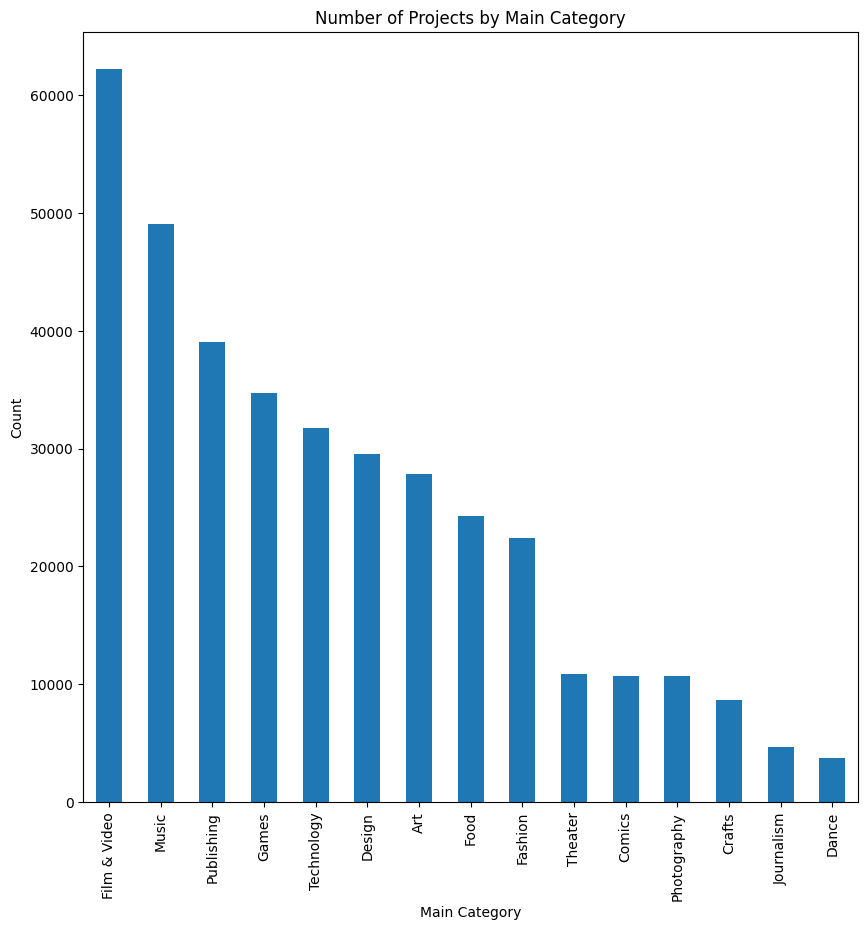

In [ ]:
plt.figure(figsize=(10,10))
df['main_category'].value_counts().plot(kind='bar')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Number of Projects by Main Category')


Text(0, 0.5, 'Count')

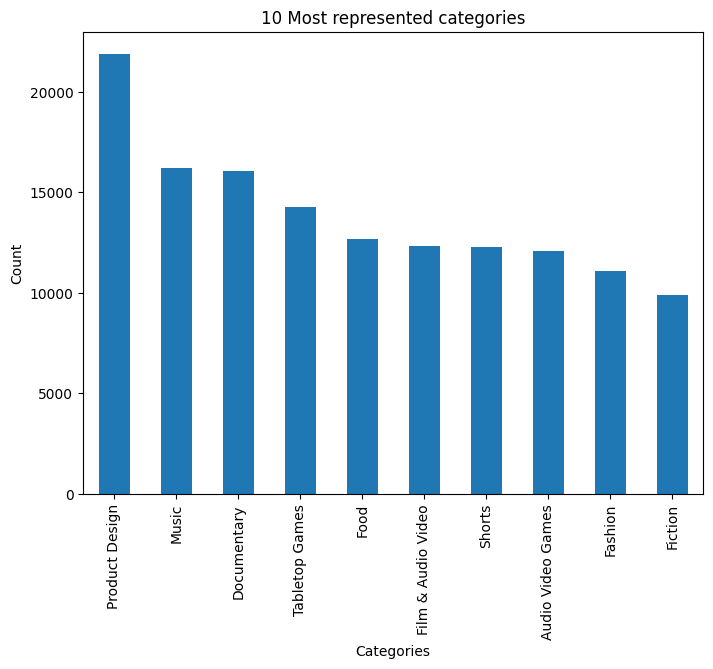

In [ ]:

plt.figure(figsize=(8,6))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title('10 Most represented categories')
plt.xlabel('Categories')
plt.ylabel('Count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f6bd81672b0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f6bd809e240>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


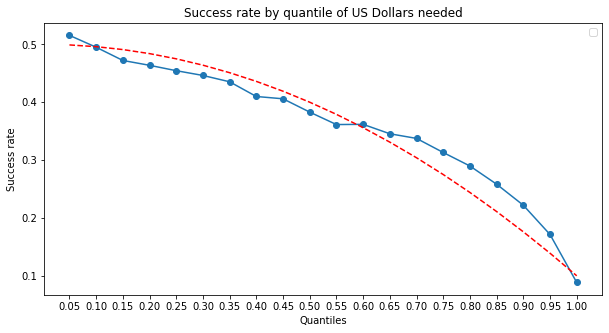

In [ ]:
df2 = df.sort_values(by=['usd_goal_adj'])
df2['decile'] = pd.qcut(df2['usd_goal_adj'], np.arange(0, 1.05, 0.05), labels=np.arange(0.05, 1.05, 0.05))
df2['decile'].isna().value_counts()

a = df2.groupby('decile')['state'].mean().tolist()
x_square = (np.arange(0.05, 1.05, 0.05)**2)*(-0.4) + 0.5


plt.figure(figsize=(10,5))
line1, = plt.plot(np.arange(0.05, 1.05, 0.05), a, marker='o' )
line2, = plt.plot(np.arange(0.05, 1.05, 0.05), x_square, linestyle = '--', color='red')

plt.xticks(np.arange(0.05, 1.05, 0.05))
plt.title('Success rate by quantile of US Dollars needed')
plt.ylabel('Success rate')
plt.xlabel('Quantiles')
plt.legend((line1, line2), (['USD success rate', 'Quadratic function']))

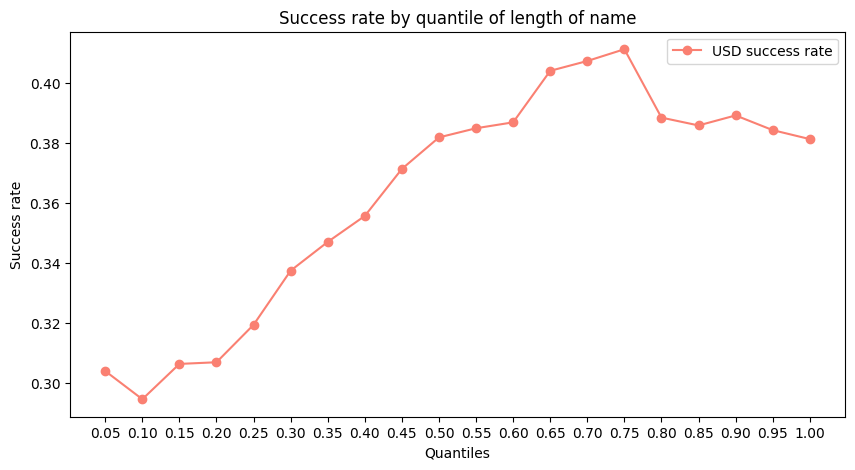

In [ ]:
df2 = df.sort_values(by=['len_name'])
df2['decile'] = pd.qcut(df2['len_name'], np.arange(0, 1.05, 0.05), labels=np.arange(0.05, 1.05, 0.05))
df2['decile'].isna().value_counts()

a = df2.groupby('decile')['state'].mean().tolist()
x_square = (np.arange(0.05, 1.05, 0.05)**2)*(-0.4) + 0.5


plt.figure(figsize=(10,5))
line1 = plt.plot(np.arange(0.05, 1.05, 0.05), a, marker='o', color = 'salmon' )

plt.xticks(np.arange(0.05, 1.05, 0.05))
plt.title('Success rate by quantile of length of name')
plt.ylabel('Success rate')
plt.xlabel('Quantiles')
plt.legend((line1), (['USD success rate']))
plt.show()

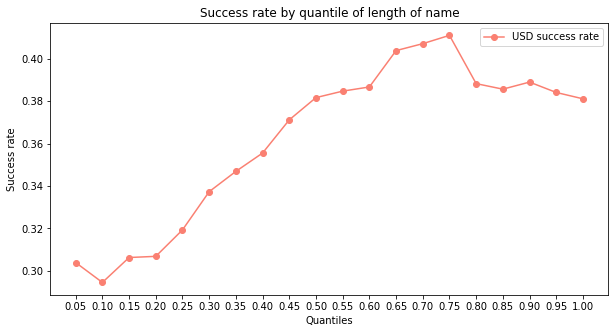

In [ ]:
df2 = df.sort_values(by=['len_name'])
df2['decile'] = pd.qcut(df2['len_name'], np.arange(0, 1.05, 0.05), labels=np.arange(0.05, 1.05, 0.05))
df2['decile'].isna().value_counts()

a = df2.groupby('decile')['state'].mean().tolist()
x_square = (np.arange(0.05, 1.05, 0.05)**2)*(-0.4) + 0.5


plt.figure(figsize=(10,5))
line1 = plt.plot(np.arange(0.05, 1.05, 0.05), a, marker='o', color = 'salmon' )

plt.xticks(np.arange(0.05, 1.05, 0.05))
plt.title('Success rate by quantile of length of name')
plt.ylabel('Success rate')
plt.xlabel('Quantiles')
plt.legend((line1), (['USD success rate']))
plt.show()

In [ ]:
df2.loc[df2['decile'] == np.arange(0.05, 1.05, 0.05)[a.index(max(a))], 'len_name'].describe()

count    17910.000000
mean        47.997878
std          0.817269
min         47.000000
25%         47.000000
50%         48.000000
75%         49.000000
max         49.000000
Name: len_name, dtype: float64

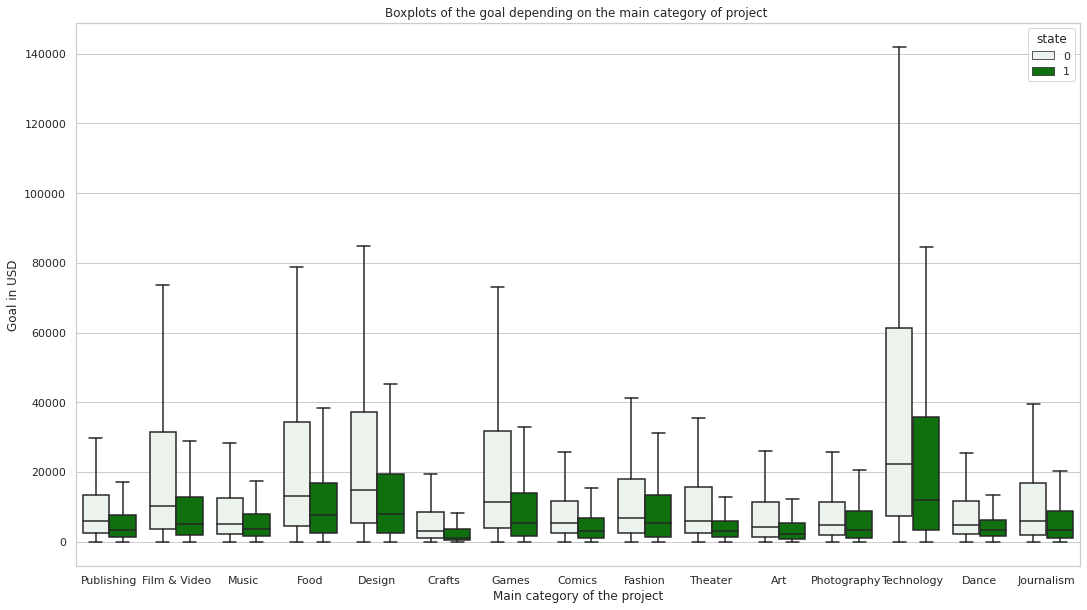

In [ ]:
#Boxplot
import seaborn as sn
plt.figure(figsize=(18,10))
sn.set(style='whitegrid')
plt.title("Boxplots of the goal depending on the main category of project ")
ax = sn.boxplot(x=df['main_category'], y=df['usd_goal_adj'], hue= df['state'], color = "green", showfliers = False, dodge=True)
ax.set(xlabel='Main category of the project', ylabel='Goal in USD')
plt.show()

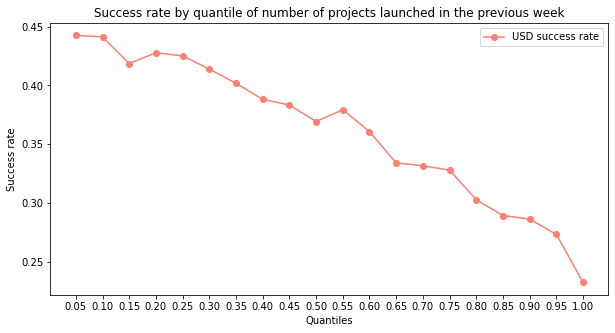

In [ ]:
df2 = df.sort_values(by=['count_7_days'])
df2['decile'] = pd.qcut(df2['count_7_days'], np.arange(0, 1.05, 0.05), labels=np.arange(0.05, 1.05, 0.05))
df2['decile'].isna().value_counts()

a = df2.groupby('decile')['state'].mean().tolist()
x_square = (np.arange(0.05, 1.05, 0.05)**2)*(-0.4) + 0.5


plt.figure(figsize=(10,5))
line1 = plt.plot(np.arange(0.05, 1.05, 0.05), a, marker='o', color = 'salmon' )

plt.xticks(np.arange(0.05, 1.05, 0.05))
plt.title('Success rate by quantile of number of projects launched in the previous week')
plt.ylabel('Success rate')
plt.xlabel('Quantiles')
plt.legend((line1), (['USD success rate']))
plt.show()

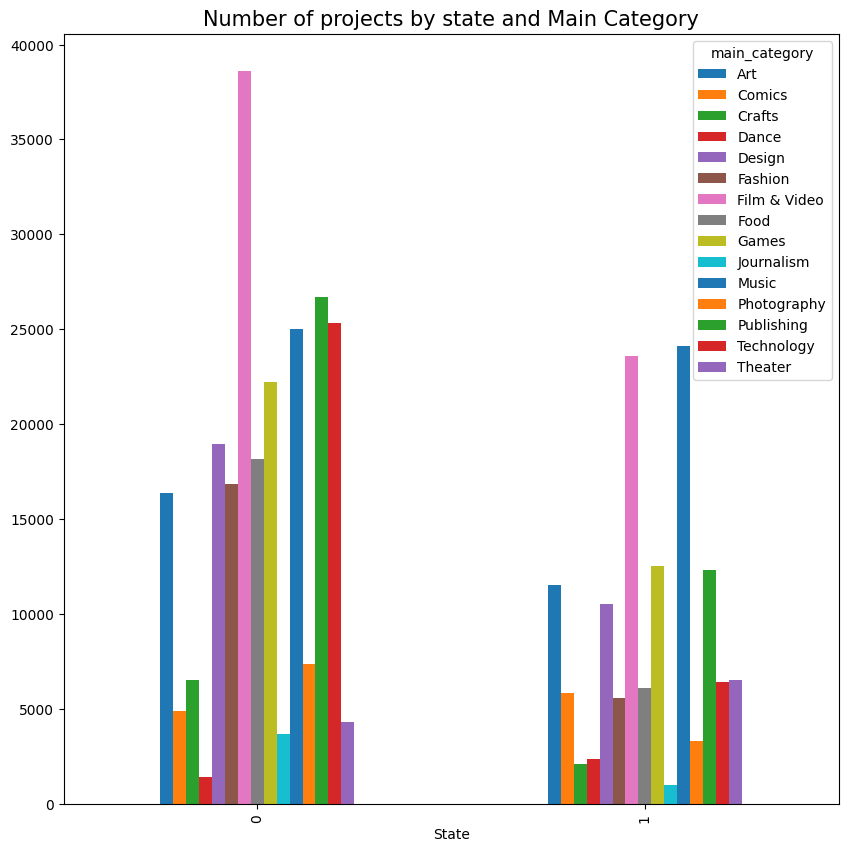

In [ ]:

df.groupby(['state', 'main_category']).count()['number_of_day'].unstack().plot(kind='bar', figsize=(10,10), xlabel='State')
plt.title('Number of projects by state and Main Category', size = 15)
plt.show()

## VIF (variance inflation factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pandas as pd
#X_to_scale
#X_not_scaled
X_VIF = df[[ 'launched_hour',
       'launched_year', 'launched_month', 'launched_day',
       'category_cat', 'main_category_cat', 'country_cat', 'currency_cat','usd_goal_adj', 'money_per_day_adj', 'number_of_day', 'count_7_days', 'len_name', 'usd_goal_sq', 'time_last_proj']]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_VIF.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) 
                          for i in range(len(X_VIF.columns))] 
  
print(vif_data)

              feature        VIF
0       launched_hour   1.018548
1       launched_year   0.000046
2      launched_month   1.006852
3        launched_day   1.017444
4        category_cat   1.038064
5   main_category_cat   1.039904
6         country_cat  35.976894
7        currency_cat  36.040404
8        usd_goal_adj   7.887604
9   money_per_day_adj   1.268296
10      number_of_day   1.021268
11       count_7_days   1.055962
12           len_name   1.009880
13        usd_goal_sq   7.310763
14     time_last_proj   1.000057


# PCA

In [ ]:
X_hot_sample = X_hot.sample(n = 1000, random_state = 0)
X_hot_sample.head()
# taking sample of 1000 to ease computation

,usd_goal_adj,money_per_day_adj,number_of_day,count_7_days,len_name,usd_goal_sq,time_last_proj,launched_hour_0,launched_hour_1,launched_hour_10,launched_hour_11,launched_hour_12,launched_hour_13,launched_hour_14,launched_hour_15,launched_hour_16,launched_hour_17,launched_hour_18,launched_hour_19,launched_hour_2,launched_hour_20,launched_hour_21,launched_hour_22,launched_hour_23,launched_hour_3,launched_hour_4,launched_hour_5,launched_hour_6,launched_hour_7,launched_hour_8,launched_hour_9,launched_year_2009,launched_year_2010,launched_year_2011,launched_year_2012,launched_year_2013,launched_year_2014,launched_year_2015,launched_year_2016,launched_year_2017,launched_year_2018,launched_month_1,launched_month_10,launched_month_11,launched_month_12,launched_month_2,launched_month_3,launched_month_4,launched_month_5,launched_month_6,launched_month_7,launched_month_8,launched_month_9,launched_day_0,launched_day_1,launched_day_2,launched_day_3,launched_day_4,launched_day_5,launched_day_6,category_cat_0,category_cat_1,category_cat_10,category_cat_11,category_cat_12,category_cat_13,category_cat_14,category_cat_15,category_cat_16,category_cat_17,category_cat_18,category_cat_19,category_cat_2,category_cat_20,category_cat_21,category_cat_22,category_cat_23,category_cat_24,category_cat_25,category_cat_26,category_cat_27,category_cat_28,category_cat_29,category_cat_3,category_cat_30,category_cat_31,category_cat_32,category_cat_33,category_cat_34,category_cat_35,category_cat_36,category_cat_37,category_cat_38,category_cat_39,category_cat_4,category_cat_40,category_cat_41,category_cat_42,category_cat_43,category_cat_44,category_cat_45,category_cat_46,category_cat_47,category_cat_48,category_cat_49,category_cat_5,category_cat_50,category_cat_51,category_cat_52,category_cat_53,category_cat_54,category_cat_55,category_cat_56,category_cat_57,category_cat_58,category_cat_59,category_cat_6,category_cat_60,category_cat_61,category_cat_62,category_cat_63,category_cat_64,category_cat_65,category_cat_66,category_cat_67,category_cat_68,category_cat_69,category_cat_7,category_cat_70,category_cat_71,category_cat_72,category_cat_73,category_cat_74,category_cat_75,category_cat_76,category_cat_77,category_cat_78,category_cat_79,category_cat_8,category_cat_80,category_cat_81,category_cat_82,category_cat_9,main_category_cat_0,main_category_cat_1,main_category_cat_10,main_category_cat_11,main_category_cat_12,main_category_cat_13,main_category_cat_14,main_category_cat_2,main_category_cat_3,main_category_cat_4,main_category_cat_5,main_category_cat_6,main_category_cat_7,main_category_cat_8,main_category_cat_9,country_cat_0,country_cat_1,country_cat_10,country_cat_11,country_cat_12,country_cat_13,country_cat_14,country_cat_15,country_cat_16,country_cat_17,country_cat_18,country_cat_19,country_cat_2,country_cat_20,country_cat_21,country_cat_3,country_cat_4,country_cat_5,country_cat_6,country_cat_7,country_cat_8,country_cat_9,currency_cat_0,currency_cat_1,currency_cat_10,currency_cat_11,currency_cat_12,currency_cat_13,currency_cat_2,currency_cat_3,currency_cat_4,currency_cat_5,currency_cat_6,currency_cat_7,currency_cat_8,currency_cat_9
137649,0.013294,0.007283,-0.326078,0.420512,1.013658,-0.010918,-0.085580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
342517,-0.033121,-0.016451,0.456098,-1.804082,0.010072,-0.010947,-0.118364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
from sklearn.decomposition import PCA
# finding number of components explaining at least 85% of 
#   the variance, the loop is used to sum the 
#   explained variance ratio
for comp in range(X_hot_sample.shape[1]):
    pca = PCA(n_components= comp, random_state=0)
    pca.fit(X_hot_sample)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break

print('\n', "Using {} components, we can explain {} % of the variability in the original data.".format(final_comp,
                                                                                                comp_check.sum()*100))

PC_pack = pd.DataFrame({'principal component' : np.arange(1,comp_check.shape[0]+1),
                        'explained variance ratio' : comp_check,
})


PC_pack.head(7)


 Using 47 components, we can explain 85.05845623918884 % of the variability in the original data.


,principal component,explained variance ratio
0,1,0.125239
1,2,0.095697
2,3,0.090515
3,4,0.045901
4,5,0.038609
5,6,0.021664
6,7,0.021264


# Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#Initialisation
rc = RidgeClassifier()
print(rc)

from numpy import arange
alphas=[0.01,0.5,1,10,100,1000]
accuracies=[]

for i in alphas :
    rc = RidgeClassifier()
    RidgeClassifier(alpha=i, copy_X=True,
                max_iter=None, # number of iterations for gradient solver, her chosen automatically
                normalize=False, #no need to normalize, already done with standard scaler before
                random_state=0, solver='auto', #choose atuomatically the best solver
                tol=0.001)
    rc.fit(X_hot_train, y_train)
    score = rc.score(X_hot_train, y_train)
    accuracies.append(round(score,4))
    print(rc.coef_[0][0])
    print(i)

print(accuracies)

In [ ]:
rc.fit(X_hot_train, y_train)
score = rc.score(X_hot_train, y_train)
print("The accuracy for the train sample is of: ", score)

The accuracy for the train sample is of:  0.6827202282472904


In [ ]:
score = rc.score(X_hot_test, y_test)
print("The accuracy for the train sample is of: ", score)

The accuracy for the train sample is of:  0.6815680183678293


In [ ]:
score = rc.score(X_hot_test_model, y_test_model)
print("The accuracy for the model sample is of: ", score)

The accuracy for the model sample is of:  0.6803073889496644


In [ ]:
y_pred = rc.predict(X_hot_test_model)
conf_ridge_mod = metrics.confusion_matrix(y_test_model, y_pred)
print(conf_ridge_mod)

[[40961  6402]
 [17269  9411]]


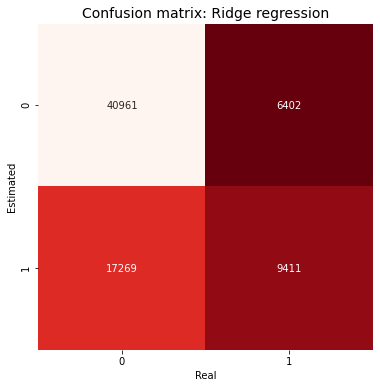

In [ ]:
df_cm = pd.DataFrame(conf_ridge_mod, range(2), range(2))


plt.figure(figsize=(6,6))
sns.heatmap(conf_ridge_mod, annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + "Ridge regression", size = 14)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

# Lasso

In [ ]:
C = [.001, .1, 1, 10]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_hot_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)

C: 0.001
Coefficient of each feature: [[-0.08537817  0.         -0.27543678 -0.22989737  0.11523173  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.06371949 -0.01457597  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.05478363
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0. 

In [ ]:
print('Training accuracy:', clf.score(X_hot_train, y_train))
print('Test accuracy:', clf.score(X_hot_test, y_test))
print('Model accuracy: ', clf.score(X_hot_test_model, y_test_model))
y_pred = clf.predict(X_hot_test_model)
print('Model Confusion matrix is: ', metrics.confusion_matrix(y_test_model, y_pred))

Training accuracy: 0.6914103386568525
Test accuracy: 0.6901104095620758
Model accuracy:  0.6878300447037532
Model Confusion matrix is:  [[40284  7079]
 [16035 10645]]


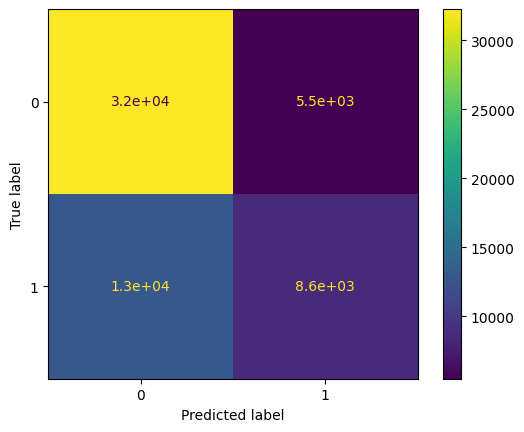

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_hot_test, y_test)  

# Elastic-net

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. 
# For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

ratio = [0.2, 0.4, 0.6, 0.8]

for i in ratio:
    clf = LogisticRegression(penalty='elasticnet', l1_ratio=i, solver='saga')
    clf.fit(X_hot_train, y_train)
    print('ratio is:', i)
    print('Training accuracy:', clf.score(X_hot_train, y_train))
    print('Test accuracy:', clf.score(X_hot_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ratio is: 0.2
Training accuracy: 0.677596481750346
Test accuracy: 0.6774825269271026


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ratio is: 0.4
Training accuracy: 0.6776175844953911
Test accuracy: 0.6775500557112469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ratio is: 0.6
Training accuracy: 0.6776049228483642
Test accuracy: 0.6774994091231388


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ratio is: 0.8
Training accuracy: 0.6775922612013371
Test accuracy: 0.6775162913191748


In [ ]:
print('Model accuracy: ', clf.score(X_hot_test_model, y_test_model))
y_pred = clf.predict(X_hot_test_model)
print('Model Confusion matrix is: ', metrics.confusion_matrix(y_test_model, y_pred))

Model accuracy:  0.6774576935024242
Model Confusion matrix is:  [[41840  5523]
 [18359  8321]]


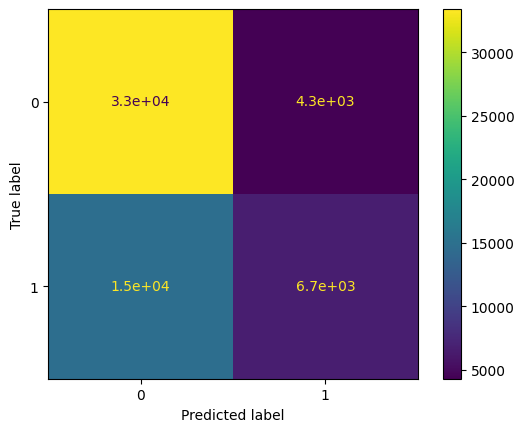

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_hot_test, y_test)  

# LinearSVC

## Plot

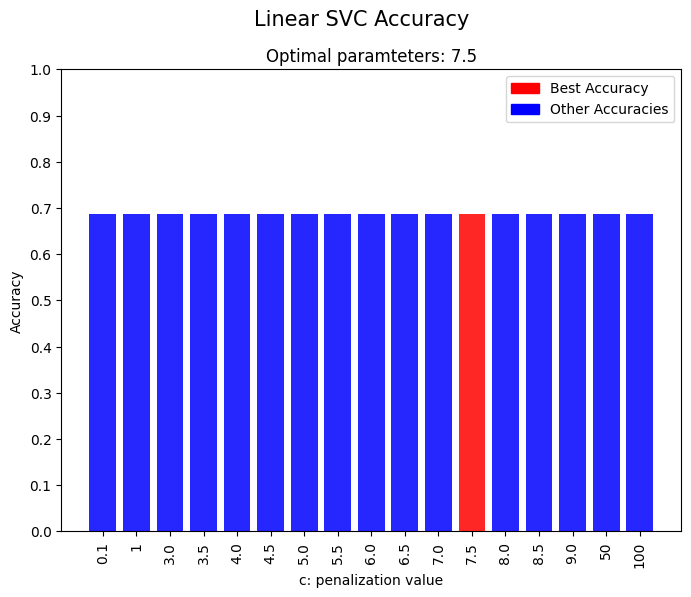

7.5


In [ ]:
accuracy =[0.6860586825134214,
 0.6862106222777459,
 0.6863456798460343,
 0.686514501806395,
 0.686244386669818,
 0.686244386669818,
 0.6862781510618902,
 0.6864469730222508,
 0.6862781510618902,
 0.6865989127865753,
 0.6862950332579262,
 0.6866326771786474,
 0.6862781510618902,
 0.6865989127865753,
 0.6862781510618902,
 0.6866157949826114,
 0.6861937400817099]


params = [0.1, 1, 3. , 3.5, 4. , 4.5, 5. ,
5.5, 6. , 6.5, 7. , 7.5, 8. ,
8.5, 9., 50, 100 ]


length = np.arange(len(params))
max_index = accuracy.index(max(accuracy))
maxi = max(accuracy)

color=[]

for i in accuracy:
  if i == max(accuracy):
    color.append('red')
  else:
    color.append('blue')


plt.figure(figsize=(8,6))
plt.bar(range(len(accuracy)), height = accuracy, color = color, alpha = 0.85)


red_patch = mpatches.Patch(color='red', label='Best Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Other Accuracies')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(len(accuracy)), params, rotation = 'vertical')
plt.title("Optimal paramteters: 7.5" )
plt.suptitle('Linear SVC Accuracy', size = 15)
plt.xlabel('c: penalization value')
plt.ylabel('Accuracy')
plt.legend(handles=[red_patch, blue_patch])
plt.show()
print(params[max_index])


## Optimal Model

In [ ]:
params = 7.5

svc = LinearSVC(C = params, random_state = 0, dual=False)
svc = svc.fit(X_hot_train, y_train)
y_pred = svc.predict(X_hot_test)

acc_svc = (metrics.accuracy_score(y_test, y_pred))
conf_svc = (metrics.confusion_matrix(y_test, y_pred))

y_pred_mod = svc.predict(X_hot_test_model)
acc_svc_mod = metrics.accuracy_score(y_test_model, y_pred_mod)
conf_svc_mod = metrics.confusion_matrix(y_test_model, y_pred_mod)

print('Accuracy on parameter train set is: ', acc_svc)
print('Confusion matrix is: \n', conf_svc)

print('Accuracy on model train set is: ', acc_svc_mod)
print('Confusion matrix is: \n', conf_svc_mod)

Accuracy on parameter train set is:  0.6866326771786474
Confusion matrix is: 
 [[32561  5151]
 [13411  8111]]
Accuracy on model train set is:  0.6861823534972921
Confusion matrix is: 
 [[40739  6624]
 [16612 10068]]


# SGD Classifier

## Plot

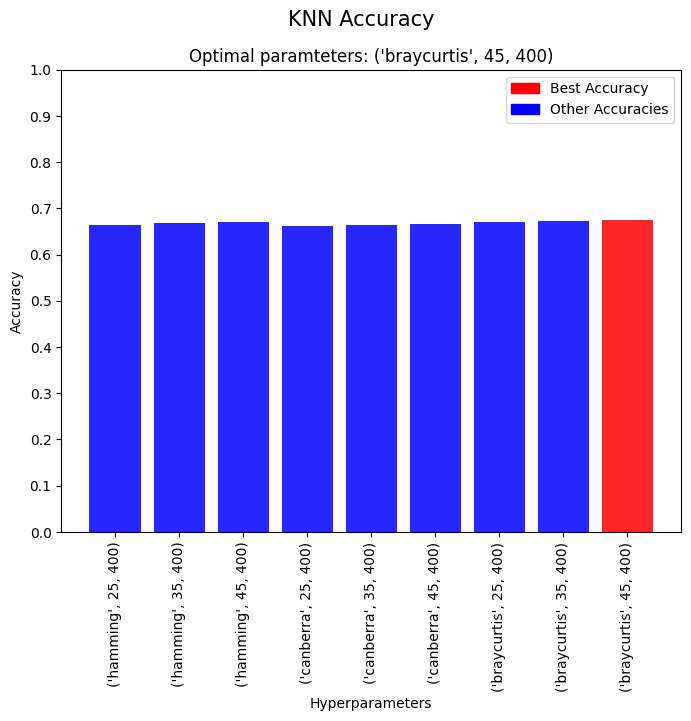

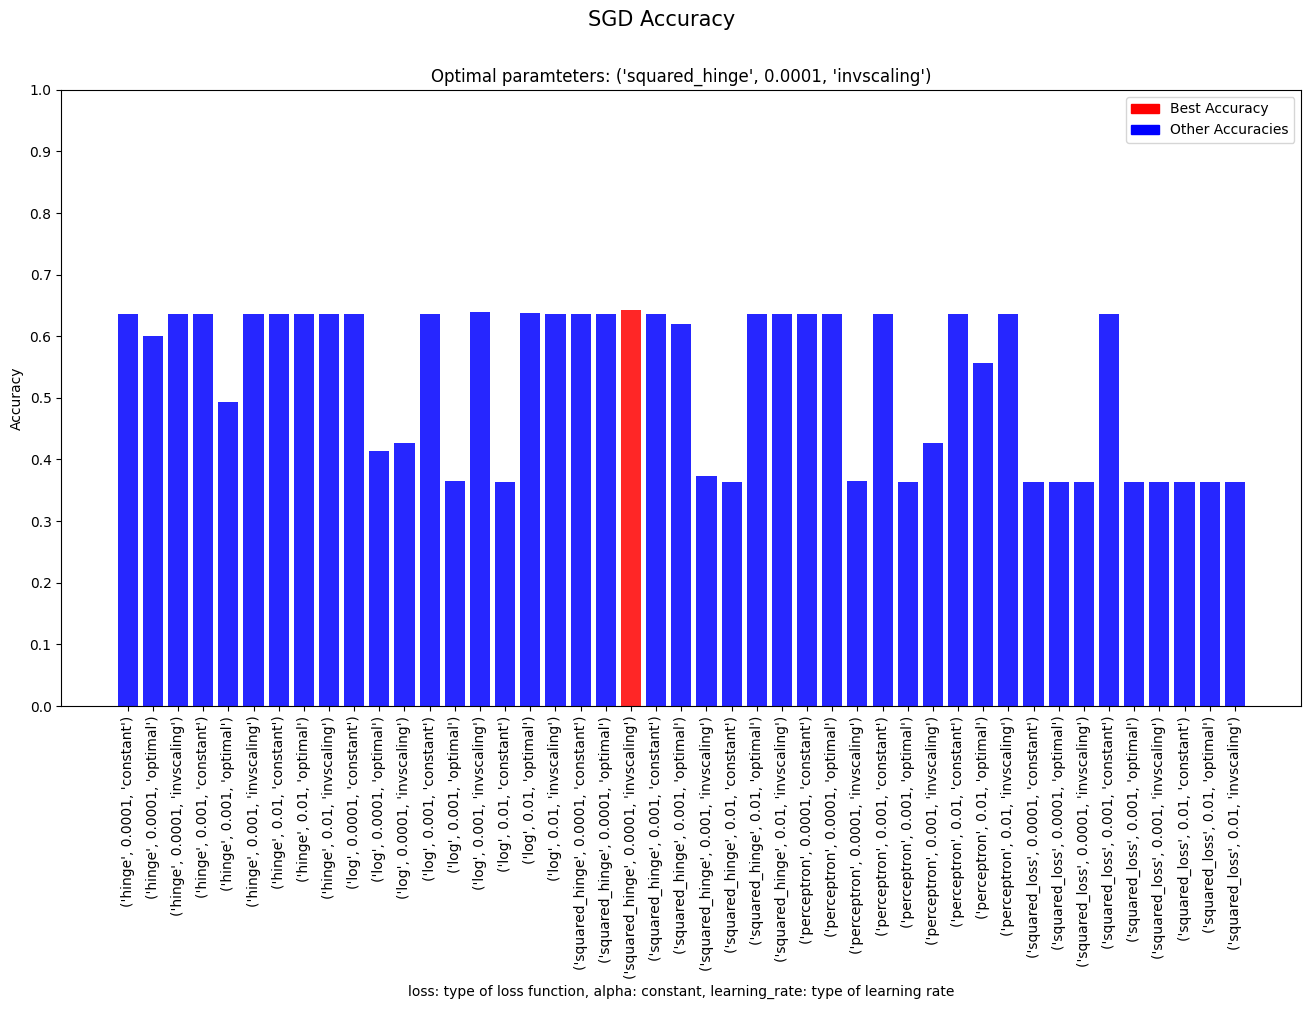

('squared_hinge', 0.0001, 'invscaling')


In [ ]:
accuracy= [0.6366613769119087,
0.6001958334740183,
0.6366613769119087,
0.6366613769119087,
0.49302765303710705,
0.6366613769119087,
0.6366613769119087,
0.6366613769119087,
0.6366613769119087,
0.6366613769119087,
0.4130566904142891,
0.4269338555559307,
0.6366613769119087,
0.3642164972819664,
0.6391599419252456,
0.3633386230880913,
0.6369483742445218,
0.6366613769119087,
0.6366613769119087,
0.6366444947158726,
0.6418610932910153,
0.6366613769119087,
0.6206401728736874,
0.37238748016341966,
0.3633386230880913,
0.6367289056960529,
0.6366613769119087,
0.6366613769119087,
0.6366613769119087,
0.36438531924232703,
0.6366613769119087,
0.36399702873349765,
0.4262585677144883,
0.6366613769119087,
0.5563696525644056,
0.6366613769119087,
0.3633386230880913,
0.3633386230880913,
0.3633386230880913,
0.6366613769119087,
0.3633386230880913,
0.3633386230880913,
0.3633386230880913,
0.3633386230880913,
0.3633386230880913]

params = [('hinge', 0.0001, 'constant'),
('hinge', 0.0001, 'optimal'),
('hinge', 0.0001, 'invscaling'),
('hinge', 0.001, 'constant'),
('hinge', 0.001, 'optimal'),
('hinge', 0.001, 'invscaling'),
('hinge', 0.01, 'constant'),
('hinge', 0.01, 'optimal'),
('hinge', 0.01, 'invscaling'),
('log', 0.0001, 'constant'),
('log', 0.0001, 'optimal'),
('log', 0.0001, 'invscaling'),
('log', 0.001, 'constant'),
('log', 0.001, 'optimal'),
('log', 0.001, 'invscaling'),
('log', 0.01, 'constant'),
('log', 0.01, 'optimal'),
('log', 0.01, 'invscaling'),
('squared_hinge', 0.0001, 'constant'),
('squared_hinge', 0.0001, 'optimal'),
('squared_hinge', 0.0001, 'invscaling'),
('squared_hinge', 0.001, 'constant'),
('squared_hinge', 0.001, 'optimal'),
('squared_hinge', 0.001, 'invscaling'),
('squared_hinge', 0.01, 'constant'),
('squared_hinge', 0.01, 'optimal'),
('squared_hinge', 0.01, 'invscaling'),
('perceptron', 0.0001, 'constant'),
('perceptron', 0.0001, 'optimal'),
('perceptron', 0.0001, 'invscaling'),
('perceptron', 0.001, 'constant'),
('perceptron', 0.001, 'optimal'),
('perceptron', 0.001, 'invscaling'),
('perceptron', 0.01, 'constant'),
('perceptron', 0.01, 'optimal'),
('perceptron', 0.01, 'invscaling'),
('squared_loss', 0.0001, 'constant'),
('squared_loss', 0.0001, 'optimal'),
('squared_loss', 0.0001, 'invscaling'),
('squared_loss', 0.001, 'constant'),
('squared_loss', 0.001, 'optimal'),
('squared_loss', 0.001, 'invscaling'),
('squared_loss', 0.01, 'constant'),
('squared_loss', 0.01, 'optimal'),
('squared_loss', 0.01, 'invscaling')]


length = np.arange(len(params))
max_index = accuracy.index(max(accuracy))
maxi = max(accuracy)

color=[]

for i in accuracy:
  if i == max(accuracy):
    color.append('red')
  else:
    color.append('blue')

plt.figure(figsize=(16,8))
plt.bar(range(len(accuracy)), height = accuracy, width = 0.8, color = color, alpha = 0.85)


red_patch = mpatches.Patch(color='red', label='Best Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Other Accuracies')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(len(accuracy)), params, rotation = 'vertical')
plt.title("Optimal paramteters: ('squared_hinge', 0.0001, 'invscaling')" )
plt.suptitle('SGD Accuracy', size = 15)
plt.xlabel('loss: type of loss function, alpha: constant, learning_rate: type of learning rate')
plt.ylabel('Accuracy')
plt.legend(handles=[red_patch, blue_patch])
plt.show()
print(params[max_index])

## Optimal Model

In [ ]:
params = ('squared_hinge', 0.0001, 'invscaling')

SGD = SGDClassifier(loss = params[0], alpha = params[1], max_iter=5000, learning_rate=params[2], eta0=1)
SGD = SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
acc_SVGD = (metrics.accuracy_score(y_test, y_pred))
conf_SVGD = (metrics.confusion_matrix(y_test, y_pred))

y_pred_mod = SGD.predict(X_test_model)
acc_SGDC_mod = metrics.accuracy_score(y_test_model, y_pred_mod)
conf_SGDC_mod = metrics.confusion_matrix(y_test_model, y_pred_mod)

print('Accuracy on parameter train set is: ', acc_SVGD)
print('Confusion matrix is: \n', conf_SVGD)

print('Accuracy on model train set is: ', acc_SGDC_mod)
print('Confusion matrix is: \n', conf_SGDC_mod)

Accuracy on parameter train set is:  0.6367289056960529
Confusion matrix is: 
 [[37682    30]
 [21488    34]]
Accuracy on model train set is:  0.6399389543913672
Confusion matrix is: 
 [[47342    21]
 [26639    41]]


# Decision Tree Classifier

## Plot

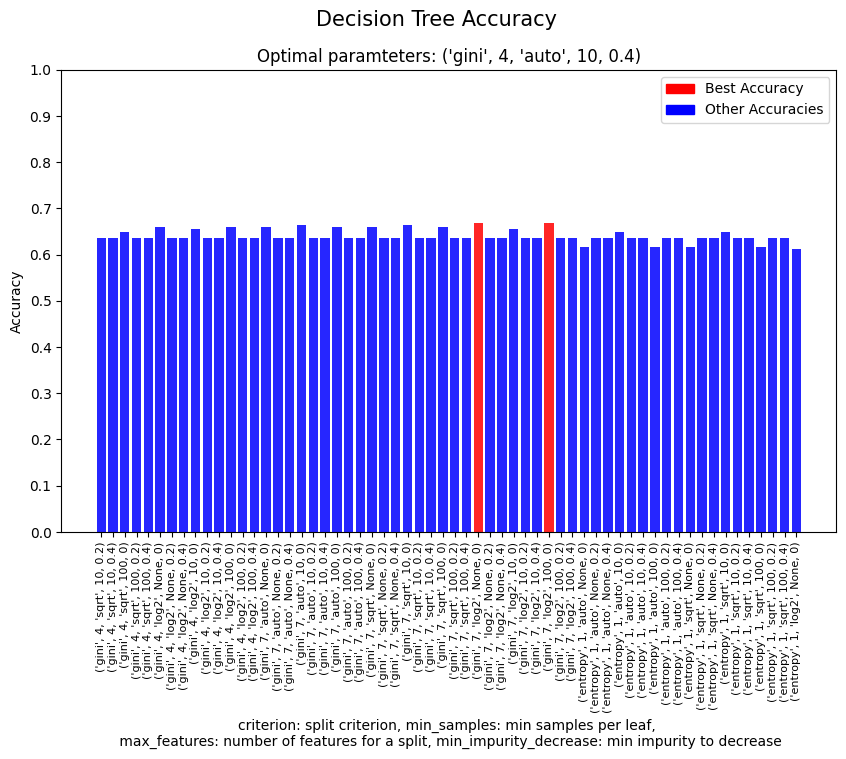

('gini', 4, 'auto', 10, 0.4)


In [ ]:
params=	[('gini', 1, 'auto', None, 0),
('gini', 1, 'auto', None, 0.2),
('gini', 1, 'auto', None, 0.4),
('gini', 1, 'auto', 10, 0),
('gini', 1, 'auto', 10, 0.2),
('gini', 1, 'auto', 10, 0.4),
('gini', 1, 'auto', 100, 0),
('gini', 1, 'auto', 100, 0.2),
('gini', 1, 'auto', 100, 0.4),
('gini', 1, 'sqrt', None, 0),
('gini', 1, 'sqrt', None, 0.2),
('gini', 1, 'sqrt', None, 0.4),
('gini', 1, 'sqrt', 10, 0),
('gini', 1, 'sqrt', 10, 0.2),
('gini', 1, 'sqrt', 10, 0.4),
('gini', 1, 'sqrt', 100, 0),
('gini', 1, 'sqrt', 100, 0.2),
('gini', 1, 'sqrt', 100, 0.4),
('gini', 1, 'log2', None, 0),
('gini', 1, 'log2', None, 0.2),
('gini', 1, 'log2', None, 0.4),
('gini', 1, 'log2', 10, 0),
('gini', 1, 'log2', 10, 0.2),
('gini', 1, 'log2', 10, 0.4),
('gini', 1, 'log2', 100, 0),
('gini', 1, 'log2', 100, 0.2),
('gini', 1, 'log2', 100, 0.4),
('gini', 4, 'auto', None, 0),
('gini', 4, 'auto', None, 0.2),
('gini', 4, 'auto', None, 0.4),
('gini', 4, 'auto', 10, 0),
('gini', 4, 'auto', 10, 0.2),
('gini', 4, 'auto', 10, 0.4),
('gini', 4, 'auto', 100, 0),
('gini', 4, 'auto', 100, 0.2),
('gini', 4, 'auto', 100, 0.4),
('gini', 4, 'sqrt', None, 0),
('gini', 4, 'sqrt', None, 0.2),
('gini', 4, 'sqrt', None, 0.4),
('gini', 4, 'sqrt', 10, 0),
('gini', 4, 'sqrt', 10, 0.2),
('gini', 4, 'sqrt', 10, 0.4),
('gini', 4, 'sqrt', 100, 0),
('gini', 4, 'sqrt', 100, 0.2),
('gini', 4, 'sqrt', 100, 0.4),
('gini', 4, 'log2', None, 0),
('gini', 4, 'log2', None, 0.2),
('gini', 4, 'log2', None, 0.4),
('gini', 4, 'log2', 10, 0),
('gini', 4, 'log2', 10, 0.2),
('gini', 4, 'log2', 10, 0.4),
('gini', 4, 'log2', 100, 0),
('gini', 4, 'log2', 100, 0.2),
('gini', 4, 'log2', 100, 0.4),
('gini', 7, 'auto', None, 0),
('gini', 7, 'auto', None, 0.2),
('gini', 7, 'auto', None, 0.4),
('gini', 7, 'auto', 10, 0),
('gini', 7, 'auto', 10, 0.2),
('gini', 7, 'auto', 10, 0.4),
('gini', 7, 'auto', 100, 0),
('gini', 7, 'auto', 100, 0.2),
('gini', 7, 'auto', 100, 0.4),
('gini', 7, 'sqrt', None, 0),
('gini', 7, 'sqrt', None, 0.2),
('gini', 7, 'sqrt', None, 0.4),
('gini', 7, 'sqrt', 10, 0),
('gini', 7, 'sqrt', 10, 0.2),
('gini', 7, 'sqrt', 10, 0.4),
('gini', 7, 'sqrt', 100, 0),
('gini', 7, 'sqrt', 100, 0.2),
('gini', 7, 'sqrt', 100, 0.4),
('gini', 7, 'log2', None, 0),
('gini', 7, 'log2', None, 0.2),
('gini', 7, 'log2', None, 0.4),
('gini', 7, 'log2', 10, 0),
('gini', 7, 'log2', 10, 0.2),
('gini', 7, 'log2', 10, 0.4),
('gini', 7, 'log2', 100, 0),
('gini', 7, 'log2', 100, 0.2),
('gini', 7, 'log2', 100, 0.4),
('entropy', 1, 'auto', None, 0),
('entropy', 1, 'auto', None, 0.2),
('entropy', 1, 'auto', None, 0.4),
('entropy', 1, 'auto', 10, 0),
('entropy', 1, 'auto', 10, 0.2),
('entropy', 1, 'auto', 10, 0.4),
('entropy', 1, 'auto', 100, 0),
('entropy', 1, 'auto', 100, 0.2),
('entropy', 1, 'auto', 100, 0.4),
('entropy', 1, 'sqrt', None, 0),
('entropy', 1, 'sqrt', None, 0.2),
('entropy', 1, 'sqrt', None, 0.4),
('entropy', 1, 'sqrt', 10, 0),
('entropy', 1, 'sqrt', 10, 0.2),
('entropy', 1, 'sqrt', 10, 0.4),
('entropy', 1, 'sqrt', 100, 0),
('entropy', 1, 'sqrt', 100, 0.2),
('entropy', 1, 'sqrt', 100, 0.4),
('entropy', 1, 'log2', None, 0),
('entropy', 1, 'log2', None, 0.2),
('entropy', 1, 'log2', None, 0.4),
('entropy', 1, 'log2', 10, 0),
('entropy', 1, 'log2', 10, 0.2),
('entropy', 1, 'log2', 10, 0.4),
('entropy', 1, 'log2', 100, 0),
('entropy', 1, 'log2', 100, 0.2),
('entropy', 1, 'log2', 100, 0.4),
('entropy', 4, 'auto', None, 0),
('entropy', 4, 'auto', None, 0.2),
('entropy', 4, 'auto', None, 0.4),
('entropy', 4, 'auto', 10, 0),
('entropy', 4, 'auto', 10, 0.2),
('entropy', 4, 'auto', 10, 0.4),
('entropy', 4, 'auto', 100, 0),
('entropy', 4, 'auto', 100, 0.2),
('entropy', 4, 'auto', 100, 0.4),
('entropy', 4, 'sqrt', None, 0),
('entropy', 4, 'sqrt', None, 0.2),
('entropy', 4, 'sqrt', None, 0.4),
('entropy', 4, 'sqrt', 10, 0),
('entropy', 4, 'sqrt', 10, 0.2),
('entropy', 4, 'sqrt', 10, 0.4),
('entropy', 4, 'sqrt', 100, 0),
('entropy', 4, 'sqrt', 100, 0.2),
('entropy', 4, 'sqrt', 100, 0.4),
('entropy', 4, 'log2', None, 0),
('entropy', 4, 'log2', None, 0.2),
('entropy', 4, 'log2', None, 0.4),
('entropy', 4, 'log2', 10, 0),
('entropy', 4, 'log2', 10, 0.2),
('entropy', 4, 'log2', 10, 0.4),
('entropy', 4, 'log2', 100, 0),
('entropy', 4, 'log2', 100, 0.2),
('entropy', 4, 'log2', 100, 0.4),
('entropy', 7, 'auto', None, 0),
('entropy', 7, 'auto', None, 0.2),
('entropy', 7, 'auto', None, 0.4),
('entropy', 7, 'auto', 10, 0),
('entropy', 7, 'auto', 10, 0.2),
('entropy', 7, 'auto', 10, 0.4),
('entropy', 7, 'auto', 100, 0),
('entropy', 7, 'auto', 100, 0.2),
('entropy', 7, 'auto', 100, 0.4),
('entropy', 7, 'sqrt', None, 0),
('entropy', 7, 'sqrt', None, 0.2),
('entropy', 7, 'sqrt', None, 0.4),
('entropy', 7, 'sqrt', 10, 0),
('entropy', 7, 'sqrt', 10, 0.2),
('entropy', 7, 'sqrt', 10, 0.4),
('entropy', 7, 'sqrt', 100, 0),
('entropy', 7, 'sqrt', 100, 0.2),
('entropy', 7, 'sqrt', 100, 0.4),
('entropy', 7, 'log2', None, 0),
('entropy', 7, 'log2', None, 0.2),
('entropy', 7, 'log2', None, 0.4),
('entropy', 7, 'log2', 10, 0),
('entropy', 7, 'log2', 10, 0.2),
('entropy', 7, 'log2', 10, 0.4),
('entropy', 7, 'log2', 100, 0),
('entropy', 7, 'log2', 100, 0.2),
('entropy', 7, 'log2', 100, 0.4)]

accuracy = [0.6107472059965561,
 0.6366613769119087,
 0.6366613769119087,
 0.6604821555187899,
 0.6366613769119087,
 0.6366613769119087,
 0.6107472059965561,
 0.6366613769119087,
 0.6366613769119087,
 0.6107472059965561,
 0.6366613769119087,
 0.6366613769119087,
 0.6604821555187899,
 0.6366613769119087,
 0.6366613769119087,
 0.6107472059965561,
 0.6366613769119087,
 0.6366613769119087,
 0.607927879258534,
 0.6366613769119087,
 0.6366613769119087,
 0.6565317216463518,
 0.6366613769119087,
 0.6366613769119087,
 0.6100719181551136,
 0.6366613769119087,
 0.6366613769119087,
 0.6495256102913867,
 0.6366613769119087,
 0.6366613769119087,
 0.6544720937299524,
 0.6366613769119087,
 0.6366613769119087,
 0.6495256102913867,
 0.6366613769119087,
 0.6366613769119087,
 0.6495256102913867,
 0.6366613769119087,
 0.6366613769119087,
 0.6544720937299524,
 0.6366613769119087,
 0.6366613769119087,
 0.6495256102913867,
 0.6366613769119087,
 0.6366613769119087,
 0.6609042104196914,
 0.6366613769119087,
 0.6366613769119087,
 0.6549447952189621,
 0.6366613769119087,
 0.6366613769119087,
 0.6609042104196914,
 0.6366613769119087,
 0.6366613769119087,
 0.659941925245636,
 0.6366613769119087,
 0.6366613769119087,
 0.6644494715872641,
 0.6366613769119087,
 0.6366613769119087,
 0.659941925245636,
 0.6366613769119087,
 0.6366613769119087,
 0.659941925245636,
 0.6366613769119087,
 0.6366613769119087,
 0.6644494715872641,
 0.6366613769119087,
 0.6366613769119087,
 0.659941925245636,
 0.6366613769119087,
 0.6366613769119087,
 0.6679947327548368,
 0.6366613769119087,
 0.6366613769119087,
 0.6562784887058108,
 0.6366613769119087,
 0.6366613769119087,
 0.6679947327548368,
 0.6366613769119087,
 0.6366613769119087,
 0.6161326265320592,
 0.6366613769119087,
 0.6366613769119087,
 0.6501333693486849,
 0.6366613769119087,
 0.6366613769119087,
 0.6161326265320592,
 0.6366613769119087,
 0.6366613769119087,
 0.6161326265320592,
 0.6366613769119087,
 0.6366613769119087,
 0.6501333693486849,
 0.6366613769119087,
 0.6366613769119087,
 0.6161326265320592,
 0.6366613769119087,
 0.6366613769119087,
 0.6118107843468278,
 0.6366613769119087,
 0.6366613769119087,
 0.6473309248066988,
 0.6366613769119087,
 0.6366613769119087,
 0.61017321133133,
 0.6366613769119087,
 0.6366613769119087,
 0.652142350676976,
 0.6366613769119087,
 0.6366613769119087,
 0.6678934395786204,
 0.6366613769119087,
 0.6366613769119087,
 0.652142350676976,
 0.6366613769119087,
 0.6366613769119087,
 0.652142350676976,
 0.6366613769119087,
 0.6366613769119087,
 0.6678934395786204,
 0.6366613769119087,
 0.6366613769119087,
 0.652142350676976,
 0.6366613769119087,
 0.6366613769119087,
 0.6641793564506872,
 0.6366613769119087,
 0.6366613769119087,
 0.6466049903771482,
 0.6366613769119087,
 0.6366613769119087,
 0.6641793564506872,
 0.6366613769119087,
 0.6366613769119087,
 0.6583718810142823,
 0.6366613769119087,
 0.6366613769119087,
 0.6572070094877942,
 0.6366613769119087,
 0.6366613769119087,
 0.6583718810142823,
 0.6366613769119087,
 0.6366613769119087,
 0.6583718810142823,
 0.6366613769119087,
 0.6366613769119087,
 0.6572070094877942,
 0.6366613769119087,
 0.6366613769119087,
 0.6583718810142823,
 0.6366613769119087,
 0.6366613769119087,
 0.6672012695411419,
 0.6366613769119087,
 0.6366613769119087,
 0.6461491710841746,
 0.6366613769119087,
 0.6366613769119087,
 0.6672012695411419,
 0.6366613769119087,
 0.6366613769119087]


length = np.arange(len(params))
max_index = accuracy.index(max(accuracy))
maxi = max(accuracy)

acc = accuracy[40:100]
param = params[40:100]
length = np.arange(len(param))
max_index = acc.index(max(acc))
maxi = max(acc)


color=[]

for i in acc:
  if i == max(acc):
    color.append('red')
  else:
    color.append('blue')


plt.figure(figsize=(10, 6))
plt.bar(range(len(acc)), height = acc, color = color, alpha = 0.85)


red_patch = mpatches.Patch(color='red', label='Best Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Other Accuracies')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(len(acc)), param, rotation = 'vertical', size = 8)
plt.title("Optimal paramteters: ('gini', 4, 'auto', 10, 0.4)" )
plt.suptitle('Decision Tree Accuracy', size = 15)
plt.xlabel('criterion: split criterion, min_samples: min samples per leaf, \n max_features: number of features for a split, min_impurity_decrease: min impurity to decrease')
plt.ylabel('Accuracy')
plt.legend(handles=[red_patch, blue_patch])
plt.show()
print(params[max_index])

## Optimal

In [ ]:
params = ('entropy', 7, 'auto', 10, 0)

tree = DecisionTreeClassifier(random_state=0, 
                              criterion = params[0], 
                              min_samples_leaf=params[1], 
                              max_features=params[2], 
                              max_depth = params[3], 
                              min_impurity_decrease=params[4])
tree = tree.fit(X_hot_train, y_train)

y_pred = tree.predict(X_hot_test)
acc_tree = (metrics.accuracy_score(y_test, y_pred))
conf_tree = (metrics.confusion_matrix(y_test, y_pred))

y_pred_mod = tree.predict(X_hot_test_model)
acc_tree_mod = metrics.accuracy_score(y_test_model, y_pred_mod)
conf_tree_mod = metrics.confusion_matrix(y_test_model, y_pred_mod)

print('Accuracy on parameter train set is: ', acc_tree)
print('Confusion matrix is: \n', conf_tree)

print('Accuracy on model train set is: ', acc_tree_mod)
print('Confusion matrix is: \n', conf_tree_mod)

Accuracy on parameter train set is:  0.6572070094877942
Confusion matrix is: 
 [[34939  2773]
 [17532  3990]]
Accuracy on model train set is:  0.6597247545345273
Confusion matrix is: 
 [[43845  3518]
 [21677  5003]]


# Cross Validation on Decision Tree Classifier

In [ ]:
X_cross_val, X_test_model, y_cross_val, y_test_model = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
params =('gini', 4, 'auto', 10, 0.4)

tree = DecisionTreeClassifier( 
                              criterion = params[0], 
                              min_samples_leaf=params[1], 
                              max_features=params[2], 
                              max_depth = params[3], 
                              min_impurity_decrease=params[4])


print(cross_val_score(tree, X_cross_val, y_cross_val, cv=10))
cross_val = cross_val_score(tree, X_cross_val, y_cross_val, cv=10)


print("%0.2f accuracy with a standard deviation of %0.2f" % (cross_val.mean(), cross_val.std()))

[0.63814701 0.63814701 0.63814701 0.63814701 0.63814701 0.63814701
 0.63814701 0.63814701 0.63814701 0.63811325]
0.64 accuracy with a standard deviation of 0.00


# KNN

## Plot

In [ ]:
accuracy =[0.6637066549616775,
 0.6678934395786204,
 0.6706790019245703,
 0.6619509065739272,
 0.6648039977040213,
 0.6659351048384374,
 0.6701050072593443,
 0.6717763446669143,
 0.6755073099908836]

params = [('hamming', 25, 400),
 ('hamming', 35, 400),
 ('hamming', 45, 400),
 ('canberra', 25, 400),
 ('canberra', 35, 400),
 ('canberra', 45, 400),
 ('braycurtis', 25, 400),
 ('braycurtis', 35, 400),
 ('braycurtis', 45, 400)]

length = np.arange(len(params))
max_index = accuracy.index(max(accuracy))
maxi = max(accuracy)


import matplotlib.patches as mpatches

color=[]

for i in accuracy:
  if i == max(accuracy):
    color.append('red')
  else:
    color.append('blue')


plt.figure(figsize=(8,6))
plt.bar(range(len(accuracy)), height = accuracy, color = color, alpha = 0.85)


red_patch = mpatches.Patch(color='red', label='Best Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Other Accuracies')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(len(accuracy)), params, rotation = 'vertical')
plt.title("Optimal paramteters: ('braycurtis', 45, 400)" )
plt.suptitle('KNN Accuracy', size = 15)
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.legend(handles=[red_patch, blue_patch])


## Optimal Model

In [ ]:


params = ('braycurtis', 45, 400)

knn = KNeighborsClassifier(n_neighbors = params[1], weights ='uniform', metric = params[0], leaf_size = params[2])
knn = knn.fit(X_train, y_train)



y_pred = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, y_pred)
conf_knn = metrics.confusion_matrix(y_test, y_pred)

y_pred_mod = knn.predict(X_test_model)
acc_knn_mod = metrics.accuracy_score(y_test_model, y_pred_mod)
conf_knn_mod = metrics.confusion_matrix(y_test_model, y_pred_mod)

print('Accuracy on parameter train set is: ', acc_knn)
print('Confusion matrix is: \n', conf_knn)

print('Accuracy on model train set is: ', acc_knn_mod)
print('Confusion matrix is: \n', conf_knn_mod)

Accuracy on parameter train set is:  0.6755073099908836
Confusion matrix is: 
 [[32087  5625]
 [13596  7926]]
Accuracy on model train set is:  0.6752427643396405
Confusion matrix is: 
 [[40211  7152]
 [16894  9786]]


# Random forest

## Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



estimators = list(range(50,400,100))
max_depths = list(range(10,50,10))
min_samples_leaf = list(range(1,5,1))


accuracies=[]
estimators_list=[]
max_depths_list=[]
min_samples_leaf_list=[]

In [ ]:
import time
start_time = time.time()


for i in estimators :
  for j in max_depths :
    for k in min_samples_leaf :
      RF_classifier = RandomForestClassifier(n_estimators=i,max_depth=j,min_samples_leaf=k, max_features='auto',verbose=1,random_state=0)
      RF_classifier.fit(X_hot_train, y_train)
      predictions = RF_classifier.predict(X_hot_test)
      accuracies.append(round(accuracy_score(y_test, predictions)*100,4))
      estimators_list.append(i)
      max_depths_list.append(j)
      min_samples_leaf_list.append(k)



print("--- %s seconds ---" % (time.time() - start_time))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

--- 8641.038702249527 seconds ---


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    8.7s finished


In [ ]:
print(max(accuracies))
print(accuracies.index(max(accuracies)))

70.1692
29


In [ ]:
import itertools

accuracy=[66.8889, 66.8586, 66.8805, 66.9345, 69.3014, 69.2947, 69.401, 69.2761, 69.7724, 69.8906, 69.8855, 69.8433, 69.6914, 69.9699, 69.9716, 69.9666, 66.9362, 66.9328, 66.8467, 66.8906, 69.4584, 69.4736, 69.3537, 69.4534, 69.8855, 70.0071, 69.9294, 69.9818, 69.9699, 70.1692, 70.0729, 70.0898, 67.0054, 66.9717, 66.9531, 66.9632, 69.5141, 69.5141, 69.4415, 69.4888, 69.9615, 70.0814, 69.9531, 70.0257, 70.0375, 70.0864, 70.1557, 70.1371, 67.0071, 67.0358, 66.9565, 67.0189, 69.5192, 69.4888, 69.4922, 69.4888, 70.0037, 70.0307, 69.9244, 69.9666, 70.0358, 70.159, 70.1675, 70.0679]
params = [estimators, max_depths,  min_samples_leaf]
params = list(itertools.product(*params))

(150, 40, 2)

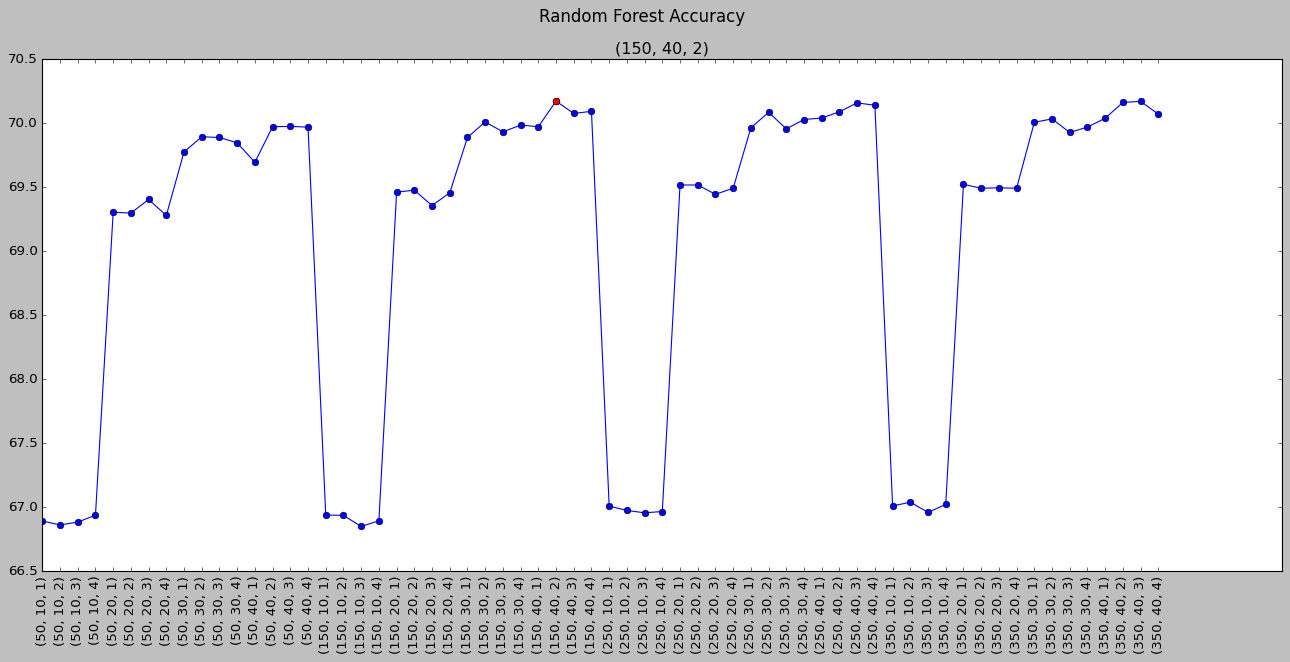

In [ ]:
length = np.arange(len(params))
max_index = accuracy.index(max(accuracy))
maxi = max(accuracy)



plt.style.use('dark_background')
plt.figure(figsize=(20,8))
plt.plot(length, accuracy, marker = 'o')
plt.plot(max_index, maxi, color = 'red', marker = 'o')
plt.xticks(length, params, rotation='vertical', size = 12)
plt.title(params[max_index])
plt.suptitle('Random Forest Accuracy', size = 15)

params[max_index]

The best model corresponds to the the following triplet of hyperparameters :
- n_estimators = 150 <br>
- max_depth = 40 <br>
- min_samples_leaf = 2 <br>

## Optimal model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RF_classifier = RandomForestClassifier(n_estimators=150,max_depth=40,min_samples_leaf=2, max_features='auto',verbose=1,random_state=0)
RF_classifier.fit(X_hot_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [ ]:
y_pred = RF_classifier.predict(X_hot_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("The accuracy for the test sample is :",accuracy_score(y_test, y_pred)*100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.8s finished


[[32883  4829]
 [12841  8681]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79     37712
           1       0.64      0.40      0.50     21522

    accuracy                           0.70     59234
   macro avg       0.68      0.64      0.64     59234
weighted avg       0.69      0.70      0.68     59234

The accuracy for the test sample is : 70.16915960428133


In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(y_pred , y_test)
mat
accuracy = sklearn.metrics.accuracy_score(y_pred , y_test)
print(accuracy)

0.7016915960428133


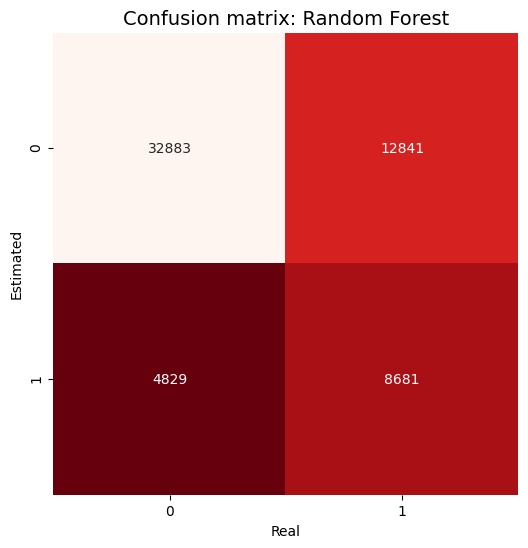

In [ ]:
df_cm = pd.DataFrame(mat, range(2), range(2))


plt.figure(figsize=(6,6))
sns.heatmap(df_cm, annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + "Random Forest", size = 14)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()


In [ ]:
y_pred = RF_classifier.predict(X_hot_test)
acc_rf = (metrics.accuracy_score(y_test, y_pred))
conf_rf = (metrics.confusion_matrix(y_test, y_pred))

y_pred_mod = RF_classifier.predict(X_hot_test_model)
acc_rf_mod = metrics.accuracy_score(y_test_model, y_pred_mod)
conf_rf_mod = metrics.confusion_matrix(y_test_model, y_pred_mod)

print('Accuracy on parameter train set is: ', acc_rf)
print('Confusion matrix is: \n', conf_rf)

print('Accuracy on model train set is: ', acc_rf_mod)
print('Confusion matrix is: \n', conf_rf_mod)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on parameter train set is:  0.7016915960428133
Confusion matrix is: 
 [[32883  4829]
 [12841  8681]]
Accuracy on model train set is:  0.7029293788744378
Confusion matrix is: 
 [[41186  6177]
 [15819 10861]]


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.3s finished


In [ ]:
### Feature importance

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  x=fi_df['feature_importance'][:10]
  print(type(x))
  y=fi_df['feature_names'][:10]
  sns.barplot(x, y)
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

<class 'pandas.core.series.Series'>


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


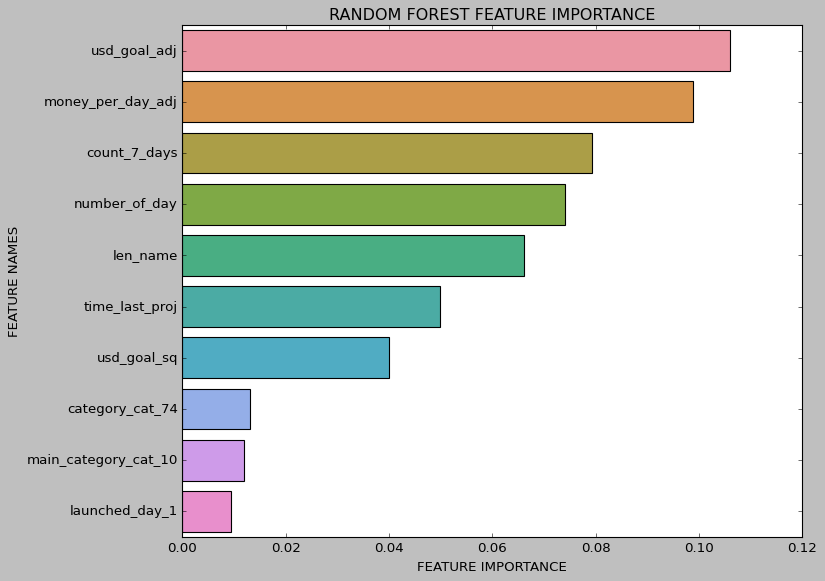

In [ ]:
plot_feature_importance(RF_classifier.feature_importances_, X_hot_test.columns,'RANDOM FOREST ')


# Neural Networks 2


In [ ]:

classifier = Sequential()

input_dim = int(X_hot_train.shape[1])
output_dim = int(X_hot_train.shape[1] / 2)


# input layer
classifier.add(Dense(output_dim, activation='relu', input_dim=input_dim))
classifier.add(Dropout(rate=0.1, seed=0))

# hidden layer
classifier.add(Dense(output_dim, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1, seed=0))


# output layer
classifier.add(Dense(1, activation='sigmoid'))

# compile
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# fit ANN
#classifier.fit(X_hot_train, y_train, batch_size=32, epochs=10)

In [ ]:
print(classifier.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 97)                18915     
_________________________________________________________________
dropout_10 (Dropout)         (None, 97)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 97)                9506      
_________________________________________________________________
dropout_11 (Dropout)         (None, 97)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 98        
Total params: 28,519
Trainable params: 28,519
Non-trainable params: 0
_________________________________________________________________
None


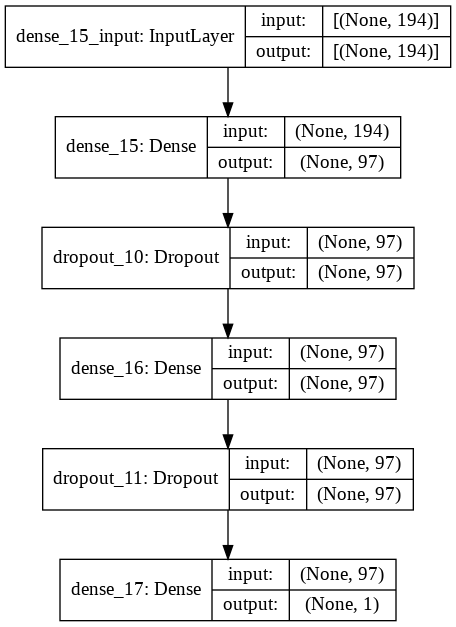

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(classifier, to_file='modelA_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
mc =  ModelCheckpoint('best_model2.h', monitor='val_loss', verbose=1, save_best_only=True)

model_history = classifier.fit(X_hot_train, y_train, validation_data = (X_hot_test, y_test), epochs = 100, batch_size = 32,callbacks=[es, mc])

Epoch 1/100
7405/7405 [==============================] - 15s 2ms/step - loss: 0.5961 - accuracy: 0.6784 - val_loss: 0.5829 - val_accuracy: 0.6884

Epoch 00001: val_loss improved from inf to 0.58294, saving model to best_model2.h
INFO:tensorflow:Assets written to: best_model2.h/assets
Epoch 2/100
7405/7405 [==============================] - 14s 2ms/step - loss: 0.5819 - accuracy: 0.6915 - val_loss: 0.5843 - val_accuracy: 0.6886

Epoch 00002: val_loss did not improve from 0.58294
Epoch 3/100
7405/7405 [==============================] - 14s 2ms/step - loss: 0.5806 - accuracy: 0.6928 - val_loss: 0.5901 - val_accuracy: 0.6895

Epoch 00003: val_loss did not improve from 0.58294
Epoch 4/100
7405/7405 [==============================] - 15s 2ms/step - loss: 0.5807 - accuracy: 0.6937 - val_loss: 0.5842 - val_accuracy: 0.6903

Epoch 00004: val_loss did not improve from 0.58294
Epoch 5/100
7405/7405 [==============================] - 14s 2ms/step - loss: 0.5806 - accuracy: 0.6934 - val_loss: 0.582

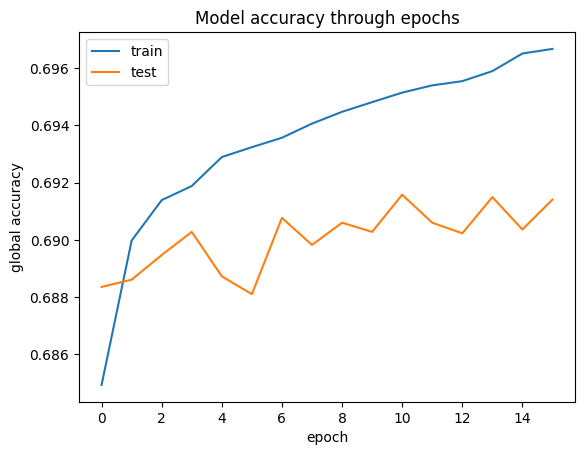

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy through epochs')
plt.ylabel('global accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


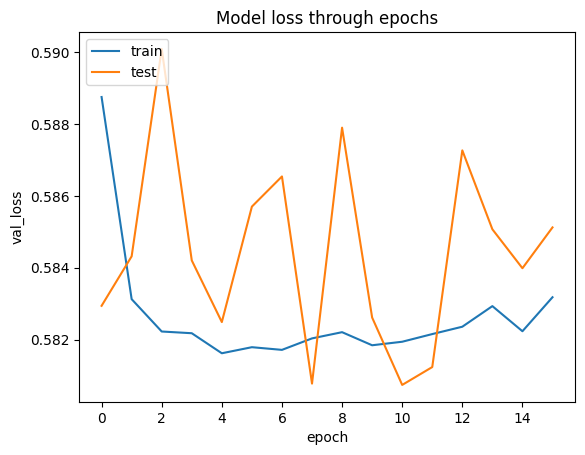

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss through epochs')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
saved_model2 = load_model('best_model2.h')

In [ ]:
train_loss, train_acc = saved_model2.evaluate(X_hot_train, y_train, verbose=0)
test_loss, test_acc = saved_model2.evaluate(X_hot_test, y_test, verbose=0)
print(f'Accuracy and loss of the best model : ')
print(f'Train accuracy: {train_acc*100:.3f} % || Test accuracy: {test_acc*100:.3f} %')
print(f'Train loss: {train_loss:.3f} || Test loss: {test_loss:.3f}')

Accuracy and loss of the best model : 
Train accuracy: 69.815 % || Test accuracy: 69.158 %
Train loss: 0.575 || Test loss: 0.581


In [ ]:
# We binarize the output as it is either 0 or 1
y_pred = saved_model2.predict(X_hot_test)
new_pred = np.where(y_pred < 0.5, 0, 1)

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(y_test,new_pred )
mat
accuracy = sklearn.metrics.accuracy_score(y_test,new_pred )
print(accuracy)

0.6915791606172131


## Optimal model

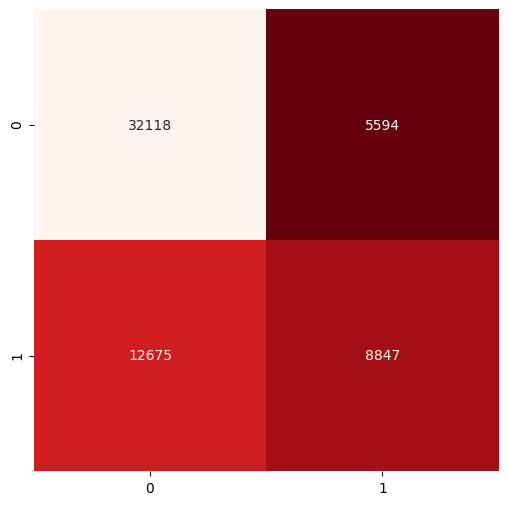

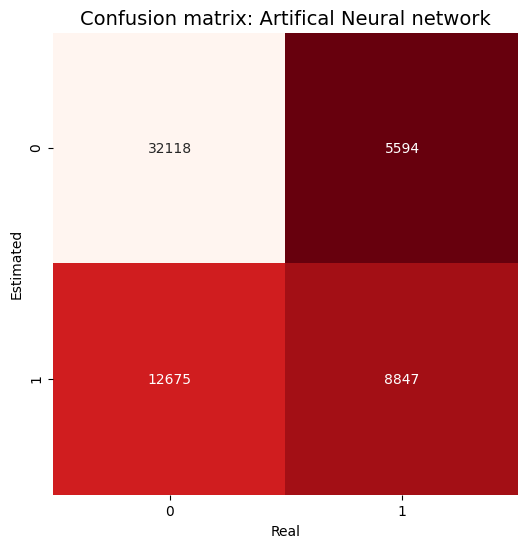

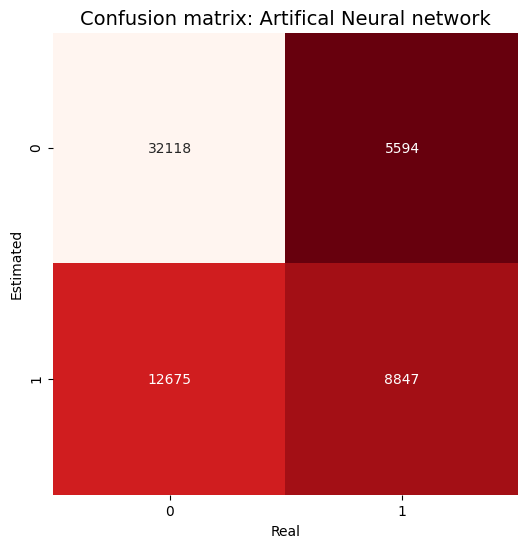

In [ ]:
df_cm = pd.DataFrame(mat, range(2), range(2))


plt.figure(figsize=(6,6))
sns.heatmap(df_cm, annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + "Artifical Neural network", size = 14)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

In [ ]:
y_pred = saved_model2.predict(X_hot_test)
y_pred = np.where(y_pred < 0.5, 0, 1)
acc_neur = (metrics.accuracy_score(y_test, y_pred))
conf_neur = (metrics.confusion_matrix(y_test, y_pred))

y_pred_mod = saved_model2.predict(X_hot_test_model)
y_pred_mod = np.where(y_pred_mod < 0.5, 0, 1)
acc_neur_mod = (metrics.accuracy_score(y_test_model, y_pred_mod))
conf_neur_mod = (metrics.confusion_matrix(y_test_model, y_pred_mod))

print('\n','Accuracy on parameter train set is: ', acc_neur)
print('Confusion matrix is: \n', conf_neur)

print('Accuracy on model train set is: ', acc_neur_mod)
print('Confusion matrix is: \n', conf_neur_mod)


 Accuracy on parameter train set is:  0.6915791606172131
Confusion matrix is: 
 [[32118  5594]
 [12675  8847]]
Accuracy on model train set is:  0.6904771551665924
Confusion matrix is: 
 [[40181  7182]
 [15736 10944]]


# Compare models

## Accuracy plot

In [ ]:
model = ['Ridge', 'Lasso', 
    'Elastic Net', 'LinearSVC', 
    'SGD Classifier', 'Decision Tree',  
    'KNN', 'Random Forest', 
    'Neural Network']

accuracies = [ 0.6803073889496644, 0.6878300447037532, 
    0.6774576935024242, 0.6861823534972921, 
    0.6399389543913672, 0.6597247545345273, 
    0.6752427643396405, 0.7029293788744378, 
    0.6904771551665924 ]
    
confusion_matrices = [ [[40961,  6402], [17269,  9411]], 
    [[44689,  2674], [22835,  3845]], 
    [[41840,  5523], [18359,  8321]],
    [[40739,  6624], [16612, 10068]], 
    [[47342,   21], [26639,    41]], 
    [[43845,  3518], [21677,  5003]], 
    [[40211,  7152], [16894,  9786]], 
    [[41186,  6177], [15819, 10861]],
    [[40181  ,  7182], [15736 , 10944]]
    ]


confusion_matrices2 = []



for i in range(len(confusion_matrices)):
  a = np.array(confusion_matrices[i])
  confusion_matrices2.append(a)

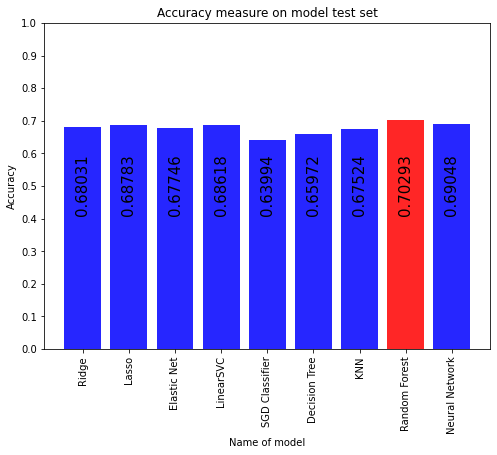

In [ ]:
color=[]

for i in accuracies:
  if i == max(accuracies):
    color.append('red')
  else:
    color.append('blue')


plt.figure(figsize=(8,6))
plot = plt.bar(range(len(accuracies)), height = accuracies, color = color, alpha = 0.85)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(len(accuracies)), model, rotation = 'vertical')
plt.title('Accuracy measure on model test set')
plt.ylabel('Accuracy')
plt.xlabel('Name of model')



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = round(rect.get_height(), 5)
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 0.4),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', rotation = 'vertical', size = 15)


autolabel(plot, "center")


plt.show()

## Ridge

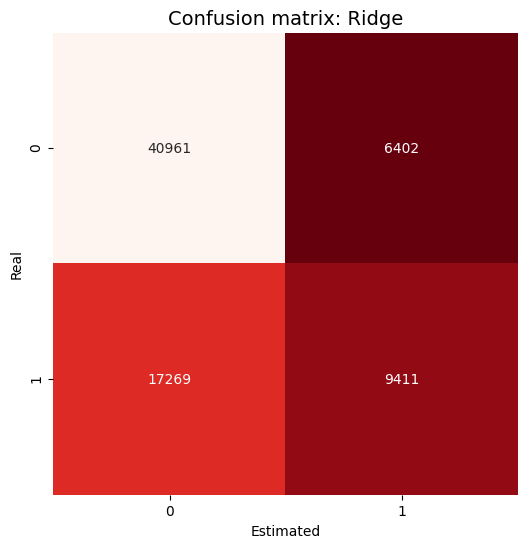

In [ ]:

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[0], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[0], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## Lasso

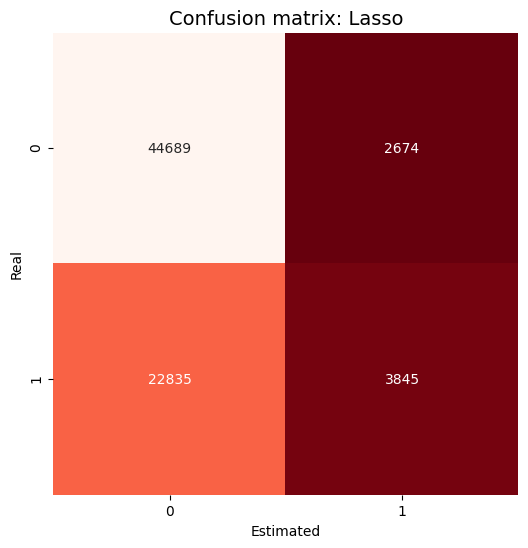

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[1], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[1], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## Elastic Net

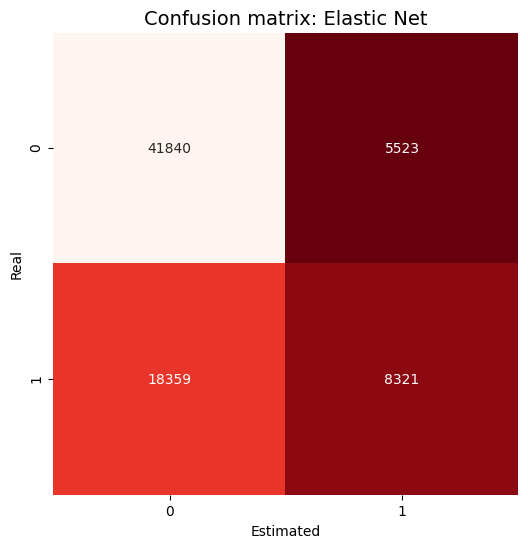

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[2], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[2], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## Linear SVC

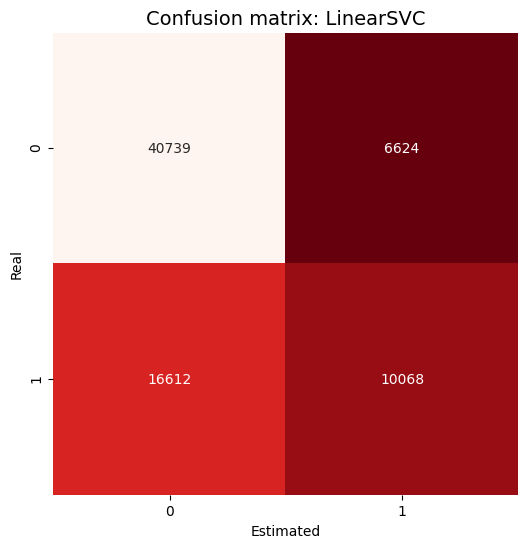

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[3], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[3], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## SGD Classifier

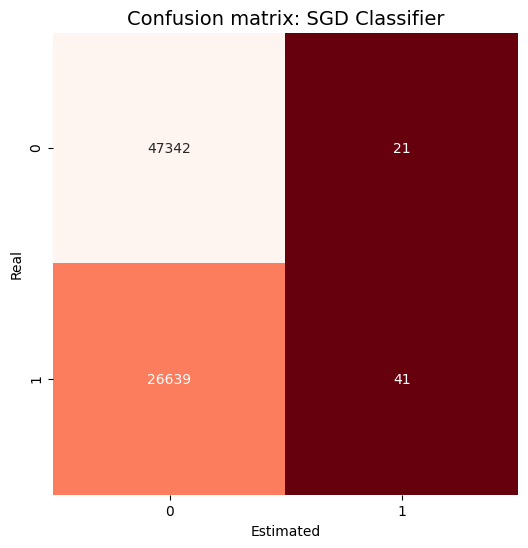

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[4], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[4], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## Decision Tree

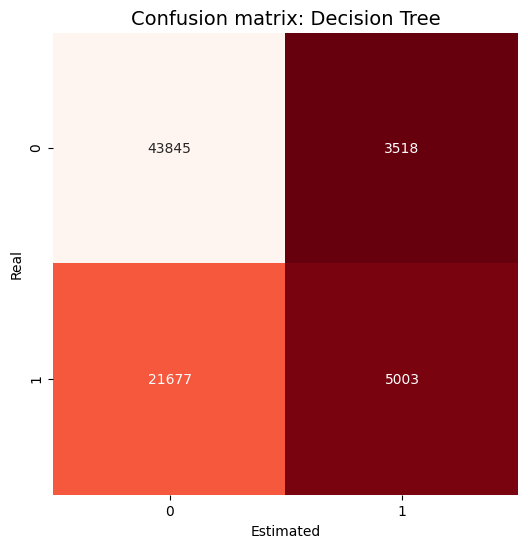

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[5], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[5], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## KNN

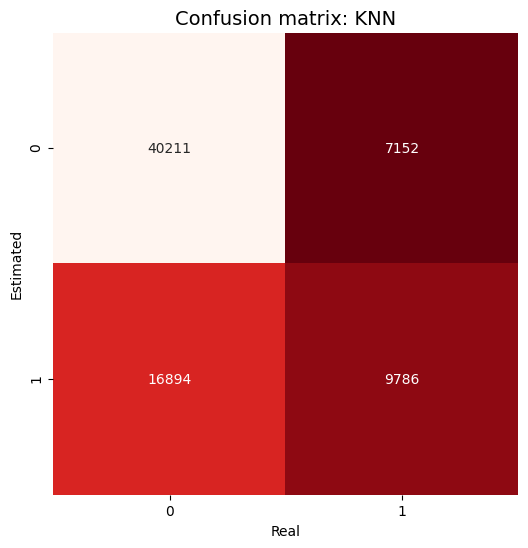

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[6], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[6], size = 14)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

## Random Forest

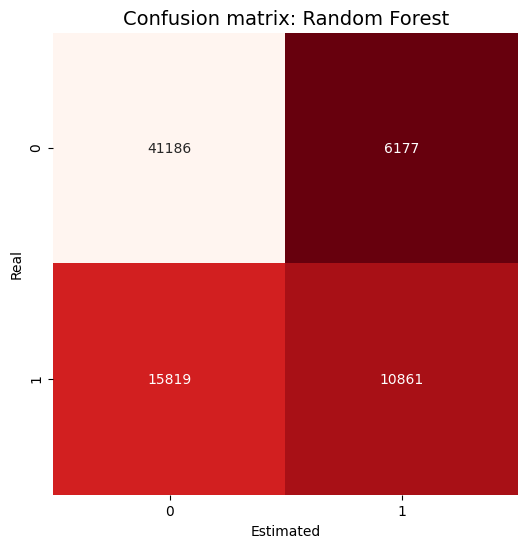

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[7], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[7], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

## Neural Network

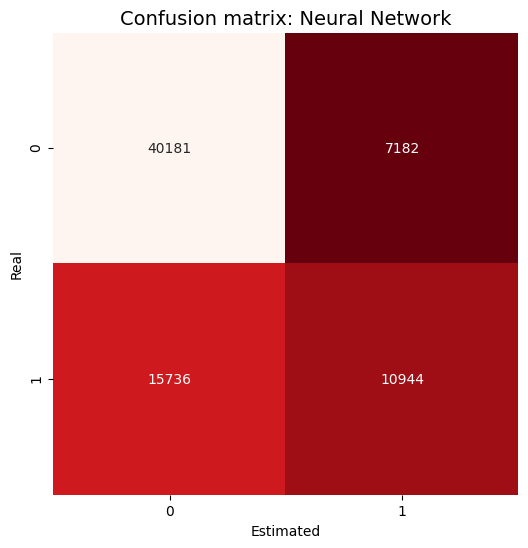

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrices2[8], annot=True, cmap = 'Reds_r', cbar=False, fmt='.0f')
plt.title('Confusion matrix: ' + model[8], size = 14)
plt.xlabel('Estimated')
plt.ylabel('Real')
plt.show()

# Clustering

## K-prototypes

In [ ]:
!pip install umap-learn==0.4.6

In [ ]:
!pip install Kmodes

In [ ]:
import umap.umap_ as umap 

In [ ]:
# Because of computer limitations, we will launch the clustering on a sample of our dataset, indeed UMAP required to much RAM to work on the whole one

# We used https://antonsruberts.github.io/kproto-audience/ code to plot the UMAP using K-prototypes

In [ ]:
X_sample = X[:50000]
X_to_scale_sample = X_to_scale[:50000]
X_not_scaled_3_sample = X_not_scaled_3[:50000]
X_hot_sample = X_hot[:50000]

categorical_weight = X_not_scaled.shape[1] / X.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(X_hot_sample)
fit2 = umap.UMAP(metric='dice').fit(X_not_scaled_3_sample)

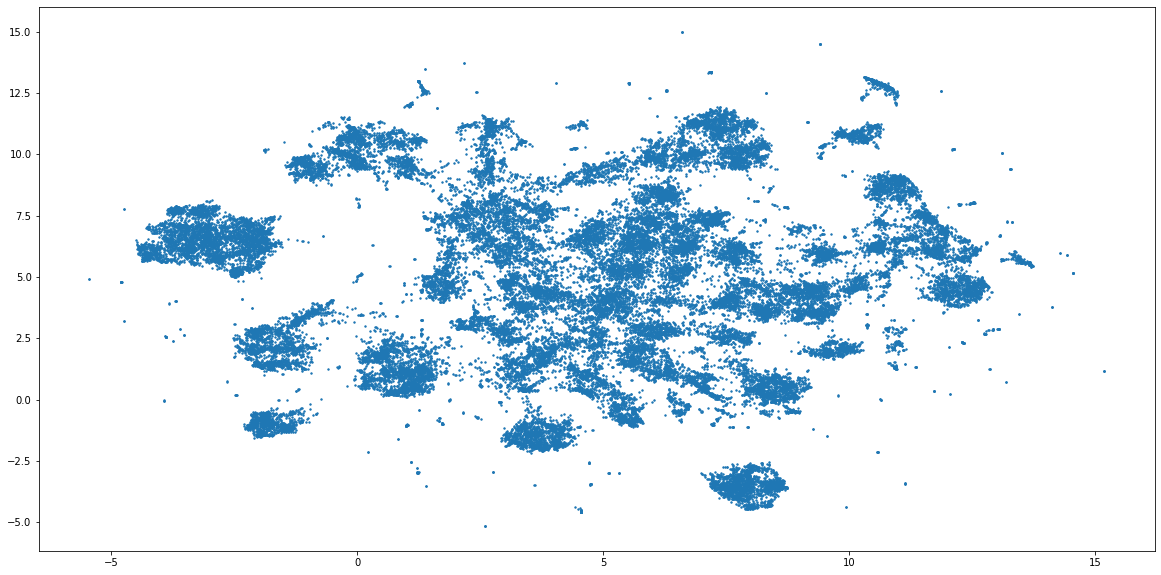

In [ ]:
#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

plt.figure(figsize=(20, 10))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [ ]:
from kmodes.kprototypes import KPrototypes

#Actual clustering
kproto = KPrototypes(n_clusters= 2, init='Cao')
clusters = kproto.fit_predict(X_sample, categorical=[7,8,9,10,11,12,13,14])

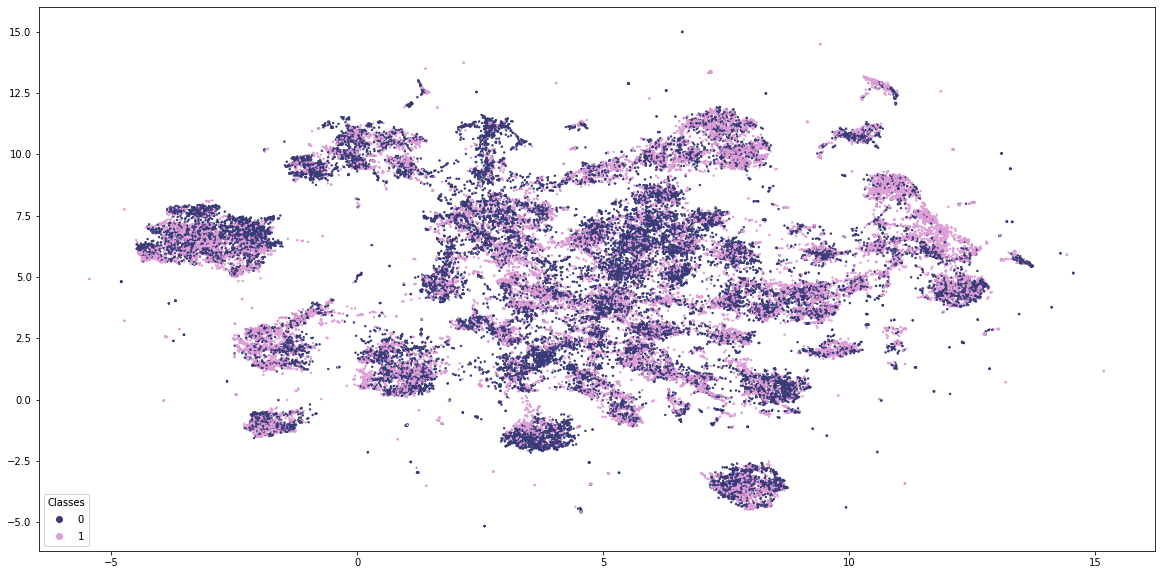

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)